In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("HR dataset Project.csv")
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [6]:
df['avg_training_score'].min()

39

In [7]:
df['department'].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [8]:
#to preserve original
Df = df.copy()

In [9]:
df.shape

(54808, 14)

In [10]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [11]:
#  descriptive statistics for categorical columns
df.describe(include = 'object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [13]:
df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [14]:
df.duplicated().sum()

0

Our target variable 'is_promoted is highly correlated to awards won by employee and KPI met by employee

### Univarient Analysis

In [15]:
df.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

In [16]:
df[['avg_training_score','is_promoted','no_of_trainings']].describe()

,avg_training_score,is_promoted,no_of_trainings
count,54808.000000,54808.000000,54808.000000
mean,63.386750,0.085170,1.253011
std,13.371559,0.279137,0.609264
min,39.000000,0.000000,1.000000
25%,51.000000,0.000000,1.000000
50%,60.000000,0.000000,1.000000
75%,76.000000,0.000000,1.000000
max,99.000000,1.000000,10.000000


In [17]:
Hr_data = df.drop('employee_id',axis = 1)
cat_data = [features for features in Hr_data.columns if Hr_data[features].dtypes == 'O']
num_data = [features for features in Hr_data.columns if Hr_data[features].dtypes != 'O']
discrete_col =  [feature for feature in num_data if len(Hr_data[feature].unique())<11]
conti_col = [feature for feature in num_data if feature not in discrete_col]


In [18]:
# changing background
plt.style.use('seaborn-v0_8-bright')

In [19]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

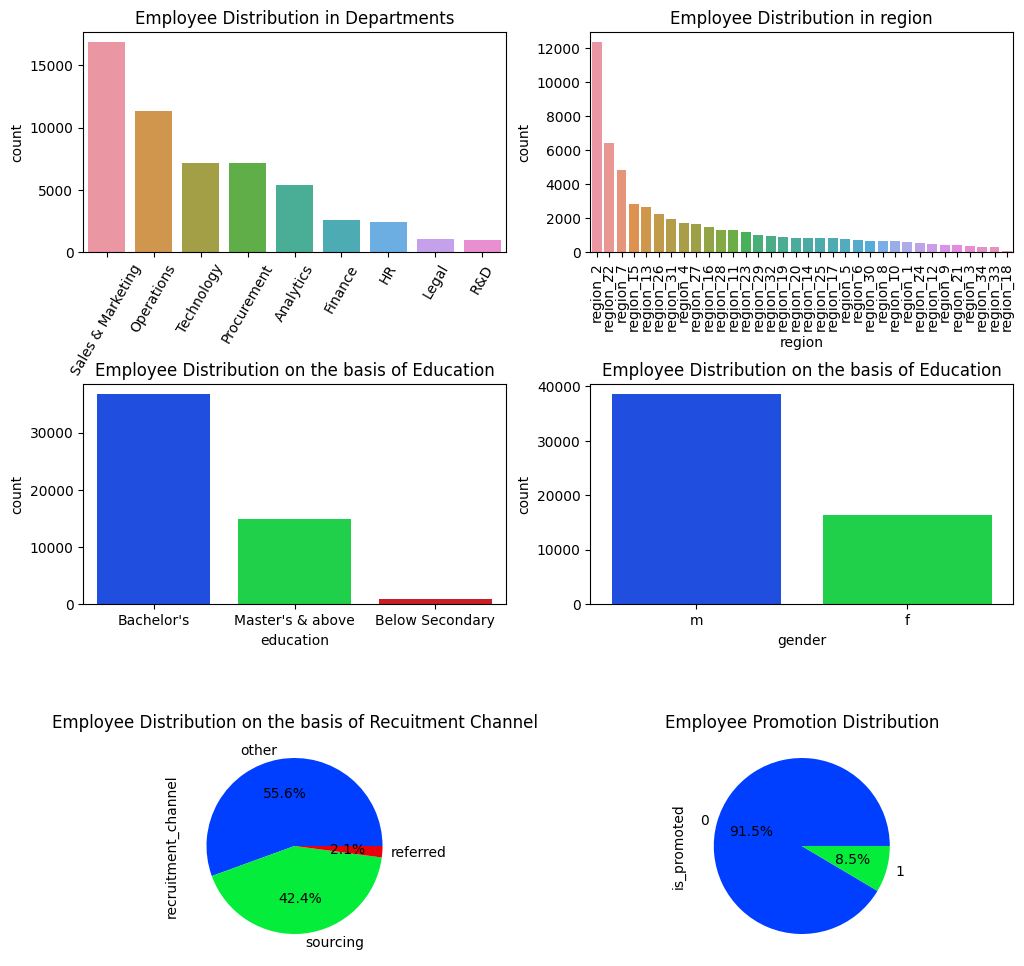

In [20]:
# figure with 3 rows and 2 columns
from cProfile import label


fig, axes = plt.subplots(3, 2, figsize=(12,12),)




# Adjusting space between plots
plt.subplots_adjust(wspace=0.2,hspace= 0.6)

# countplot for department in the first row, first column
sns.countplot(data=df, x='department', ax=axes[0,0],order=df['department'].value_counts().index)
axes[0,0].set_title('Employee Distribution in Departments')

# countplot for region in the first row, second column
sns.countplot(data=df, x='region', ax=axes[0,1],order=df['region'].value_counts().index)
axes[0,1].set_title('Employee Distribution in region')

# countplot for education in the second row, first column
sns.countplot(data=df, x='education', ax=axes[1,0],order=df['education'].value_counts().index)
axes[1,0].set_title('Employee Distribution on the basis of Education')

# countplot for gender in the second row, second column
sns.countplot(data=df, x='gender', ax=axes[1,1],order=df['gender'].value_counts().index)
axes[1,1].set_title('Employee Distribution on the basis of Education')

# countplot for recruitment_channel in the third row, first column
df['recruitment_channel'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',ax= axes[2,0],)
axes[2,0].set_title('Employee Distribution on the basis of Recuitment Channel')

# countplot for recruitment_channel in the third row, second column
df['is_promoted'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',ax= axes[2,1])


axes[2,1].set_title('Employee Promotion Distribution')

# Rotate x-axis labels by 90 degrees
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=60)
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=90)

plt.show()

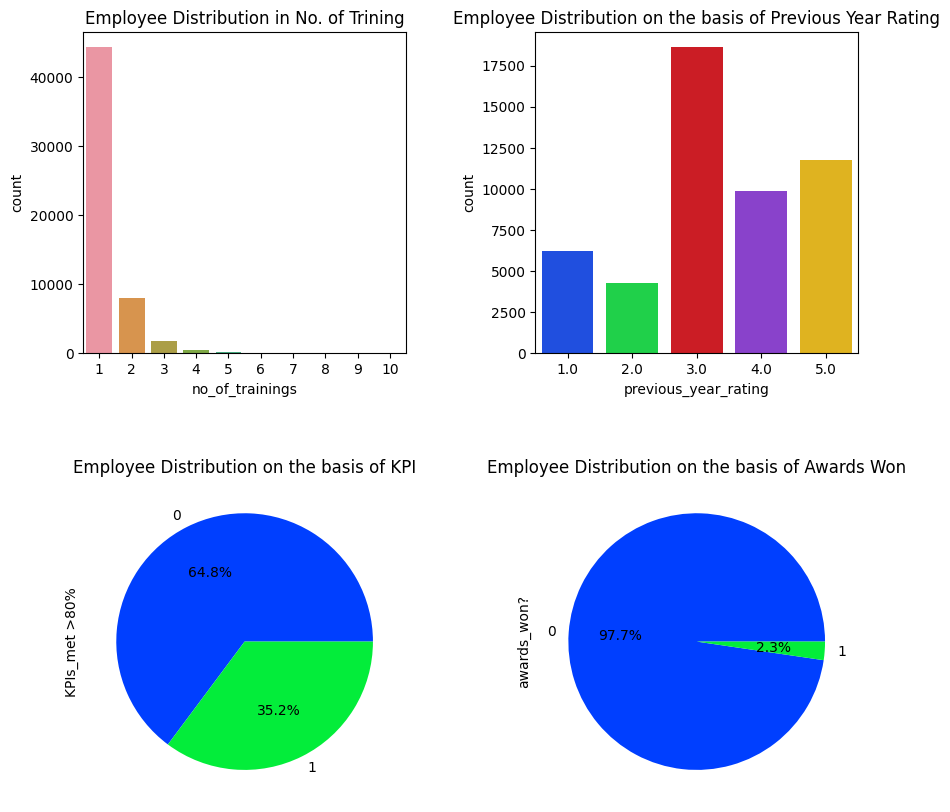

In [21]:
# figure with 3 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(10,10))



# Adjusting space between plots
plt.subplots_adjust(wspace=0.4,hspace= 0.4)

# countplot for no_of_trainings in the first row, first column
sns.countplot(data=df, x='no_of_trainings', ax=axes[0,0])
axes[0,0].set_title('Employee Distribution in No. of Trining')

# countplot for previous_year_rating in the first row, second column
sns.countplot(data=df, x='previous_year_rating', ax=axes[0,1])
axes[0,1].set_title('Employee Distribution on the basis of Previous Year Rating')

# countplot for 'KPIs_met >80%' in the second row, first column
df['KPIs_met >80%'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',ax= axes[1,0])
axes[1,0].set_title('Employee Distribution on the basis of KPI')

# countplot for Awards Won in the second row, second column
df['awards_won?'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',ax= axes[1,1])
axes[1,1].set_title('Employee Distribution on the basis of Awards Won')


plt.show()

In [22]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [23]:
conti_col

['age', 'length_of_service', 'avg_training_score']

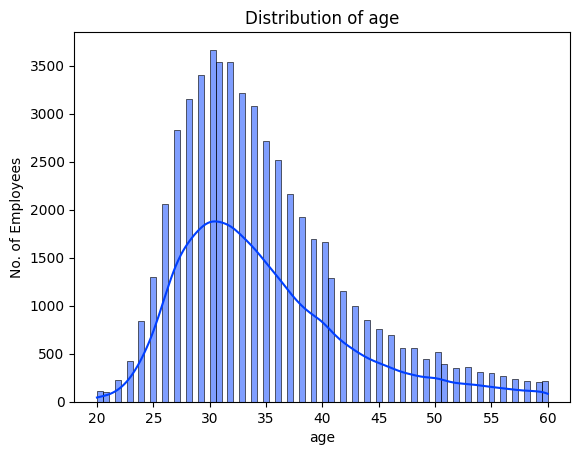

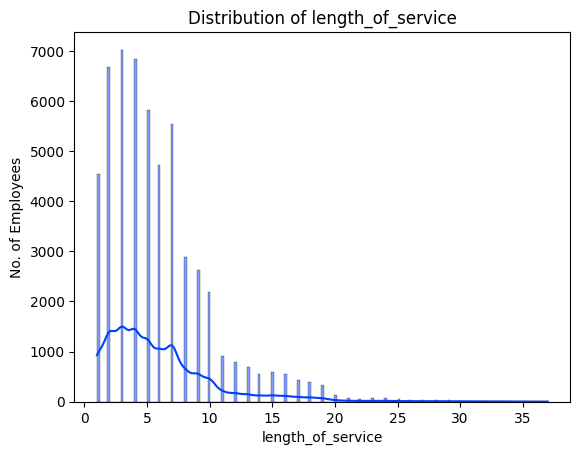

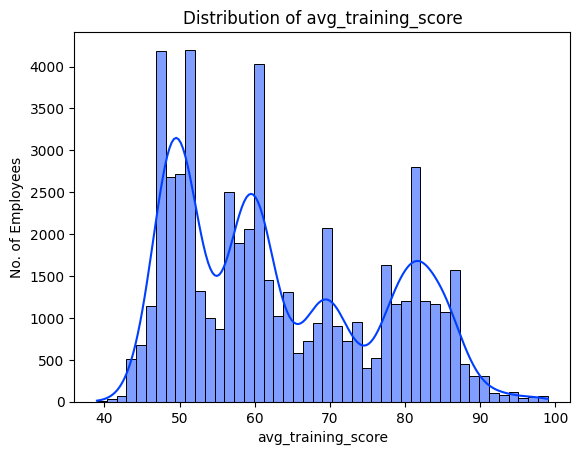

In [24]:


for feature in conti_col:
    data = df.copy()
    sns.histplot(x=data[feature],data = data,kde=True)
    plt.title('Distribution of '+feature)
    plt.ylabel('No. of Employees')

    plt.show()




In [25]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

## Promotion Status of each Catagorical column

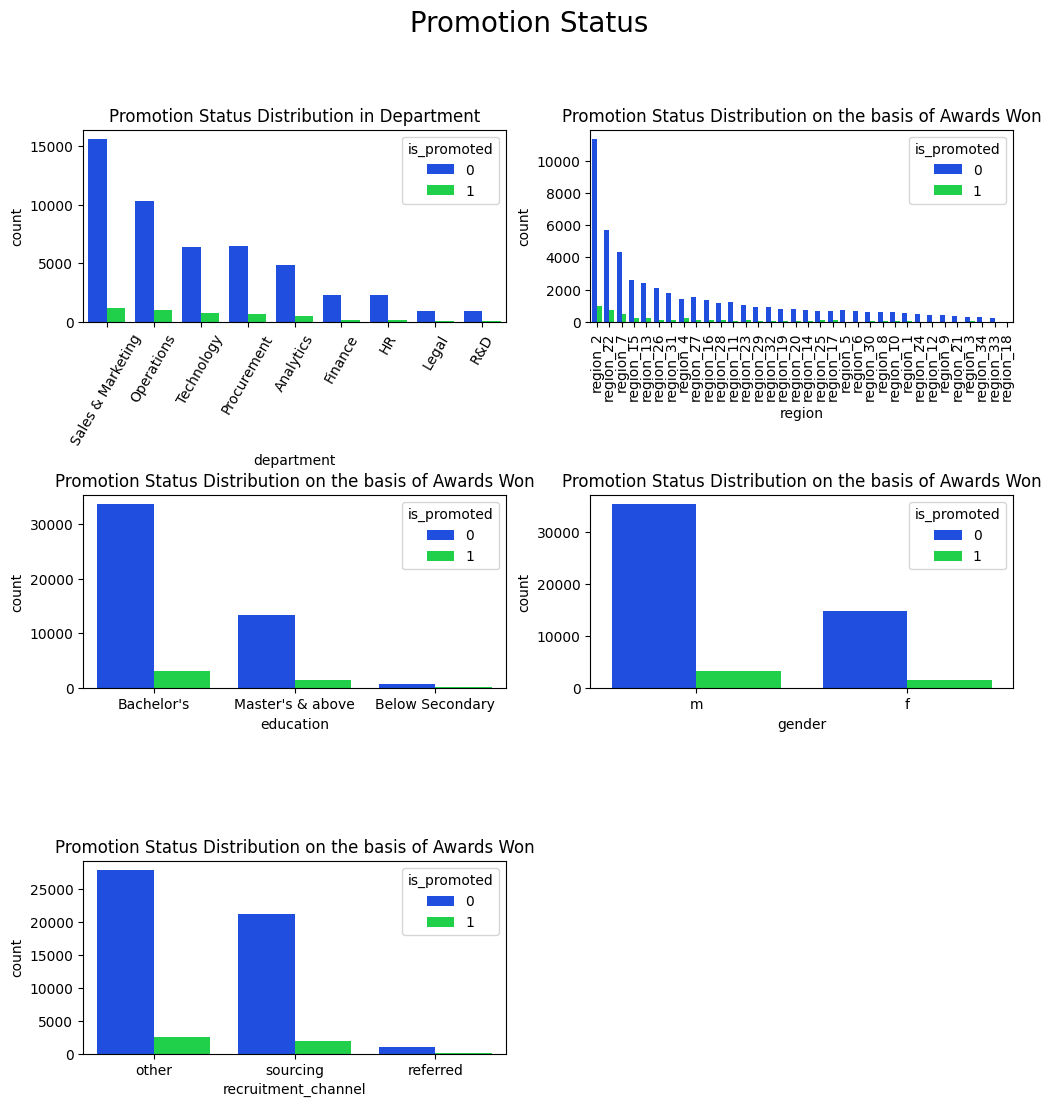

In [26]:
# figure with 3 rows and 2 columns
fig, axes = plt.subplots(3, 2, figsize=(12,12),)

fig.suptitle(' Promotion Status  ', fontsize=20)


# Adjusting space between plots
plt.subplots_adjust(wspace=0.2,hspace= 0.9)

# countplot for department in the first row, first column
sns.countplot(data=df, x='department',hue=df['is_promoted'], ax=axes[0,0],order=df['department'].value_counts().index)
axes[0,0].set_title('Promotion Status Distribution in Department')

# countplot for region in the first row, second column
sns.countplot(data=df, x='region',hue=df['is_promoted'], ax=axes[0,1],order=df['region'].value_counts().index)
axes[0,1].set_title('Promotion Status Distribution on the basis of Awards Won')
# countplot for education in the second row, first column
sns.countplot(data=df, x='education',hue=df['is_promoted'], ax=axes[1,0],order=df['education'].value_counts().index)
axes[1,0].set_title('Promotion Status Distribution on the basis of Awards Won')
# countplot for gender in the second row, second column
sns.countplot(data=df, x='gender',hue=df['is_promoted'], ax=axes[1,1],order=df['gender'].value_counts().index)
axes[1,1].set_title('Promotion Status Distribution on the basis of Awards Won')
# countplot for recruitment_channel in the third row, first column
sns.countplot(data=df, x='recruitment_channel',hue=df['is_promoted'], ax=axes[2,0],order=df['recruitment_channel'].value_counts().index)
axes[2,0].set_title('Promotion Status Distribution on the basis of Awards Won')

# deleting unused plot
fig.delaxes(axes[2,1])


# Rotate x-axis labels by 90 degrees
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=60)
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=90)

plt.show()

## Promotion Staus of Discrete column

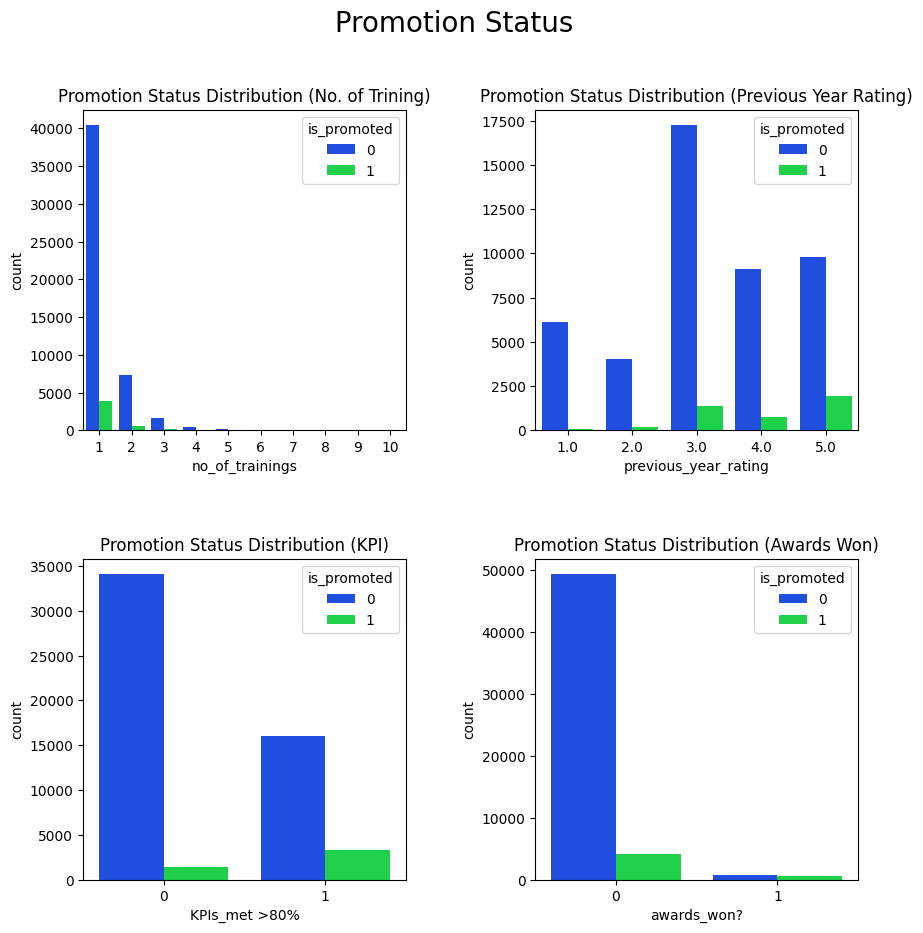

In [27]:
# figure with 3 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(10,10))

fig.suptitle(' Promotion Status  ', fontsize=20)

# Adjusting space between plots
plt.subplots_adjust(wspace=0.4,hspace= 0.4)

# countplot for no_of_trainings in the first row, first column
sns.countplot(data=df, x='no_of_trainings',hue=df['is_promoted'],ax=axes[0,0])
axes[0,0].set_title('Promotion Status Distribution (No. of Trining)')

# countplot for previous_year_rating in the first row, second column
sns.countplot(data=df, x='previous_year_rating',hue=df['is_promoted'], ax=axes[0,1])
axes[0,1].set_title('Promotion Status Distribution (Previous Year Rating)')

# countplot for 'KPIs_met >80%' in the second row, first column
sns.countplot(data=df, x='KPIs_met >80%',hue=df['is_promoted'], ax=axes[1,0])
axes[1,0].set_title('Promotion Status Distribution (KPI)')

# countplot for Awards Won in the second row, second column
sns.countplot(data=df, x='awards_won?',hue=df['is_promoted'], ax=axes[1,1])
axes[1,1].set_title('Promotion Status Distribution (Awards Won)')

plt.show()

## Promotion Status Distribution of Continuous Numbercal column

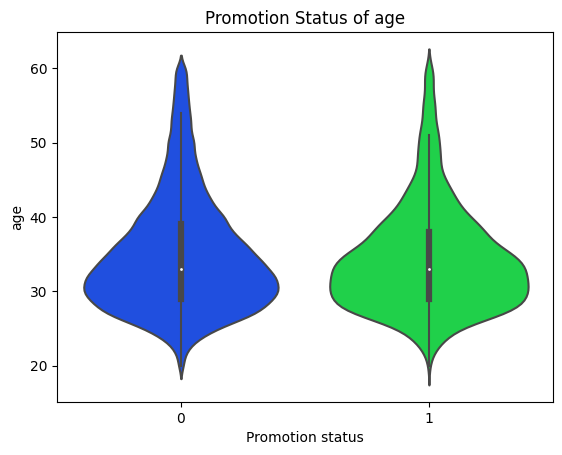

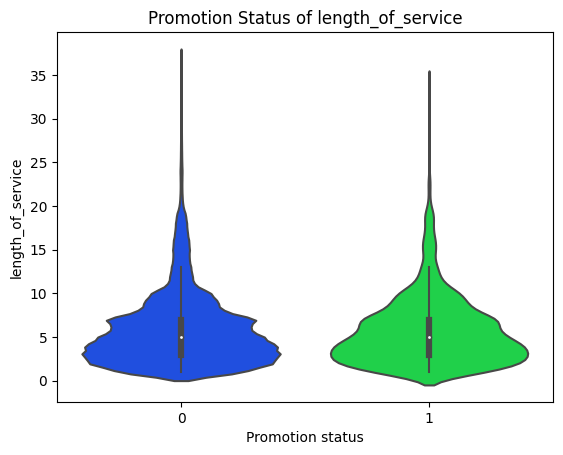

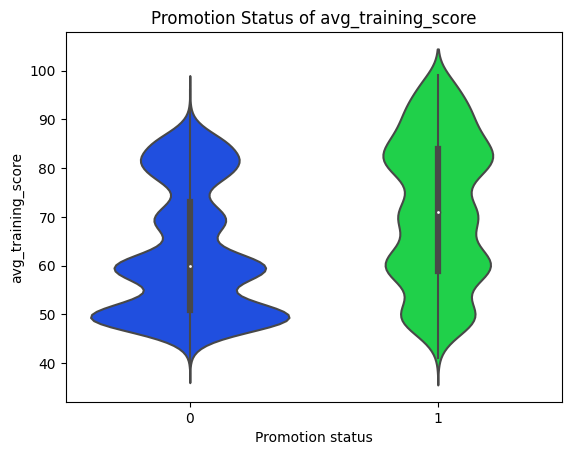

In [28]:
for feature in conti_col:

    sns.violinplot(x = data['is_promoted'],y=data[feature])
    plt.xlabel('Promotion status')
    plt.ylabel(feature)
    plt.title('Promotion Status of '+ feature)
    plt.show()

## Percentage wise Analysis of Promotion Status

In [29]:
data = df.copy()

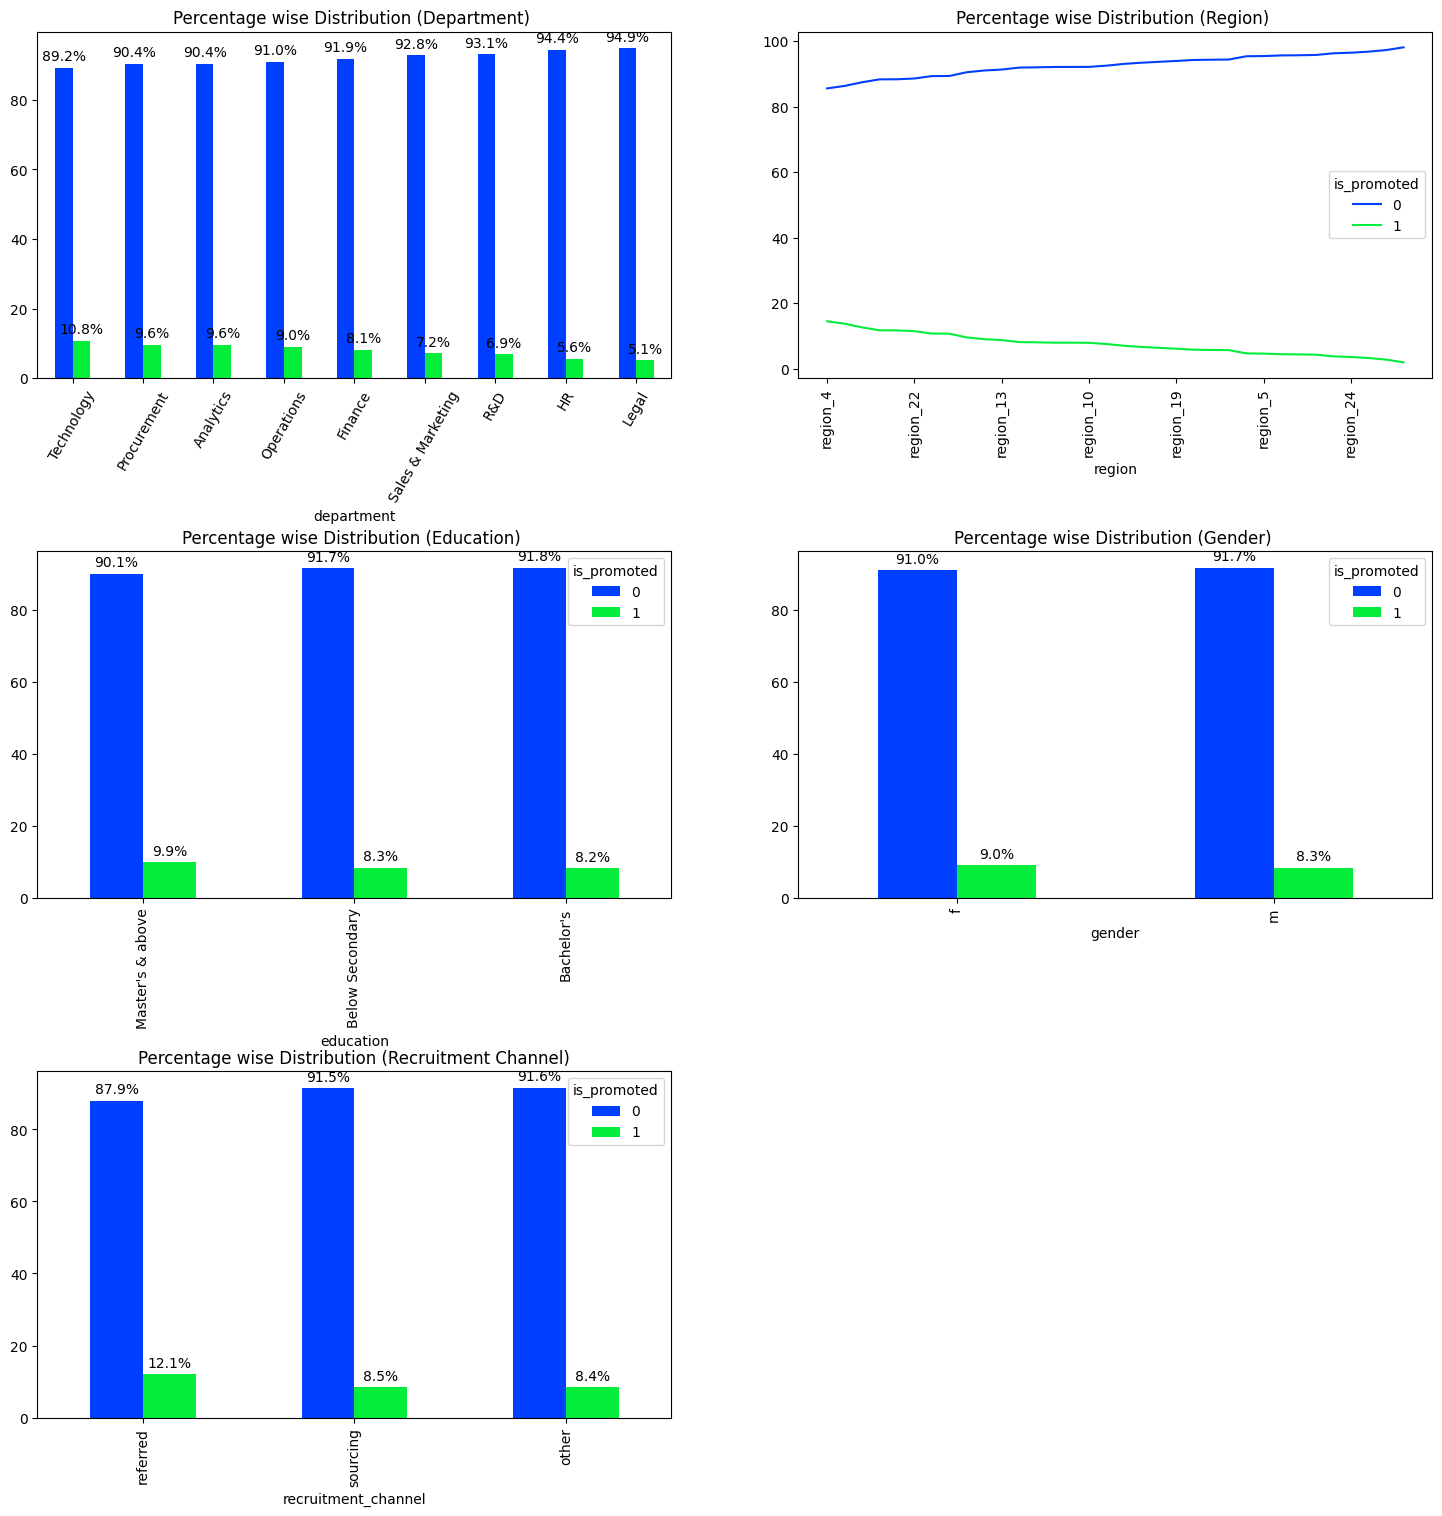

In [30]:
# figure with 3 rows and 2 columns
fig, axes = plt.subplots(3, 2, figsize=(18, 18),gridspec_kw={"height_ratios": [7, 7, 7]})




# Adjusting space between plots
plt.subplots_adjust(wspace=0.2,hspace= 0.5)

# plot for department in the first row, first column
data = df.copy()
value = data[['is_promoted','department']].groupby(['department']).value_counts(normalize=True).unstack()
percent = value*100
percent.sort_values(by = 1,ascending = False,inplace = True)

ax = percent.plot(kind='bar',ax = axes[0,0])
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3, labels=[f'{x:.1f}%' for x in container.datavalues])
plt.legend(title='Promotion_Status', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,0].set_title('Percentage wise Distribution (Department) ')

# plot for region in the first row, second columnstacked_data = data.pivot_table(index='department', columns='is_promoted', aggfunc='size', )
data = df.copy()
value = data[['is_promoted','region']].groupby(['region']).value_counts(normalize=True).unstack()
percent = value*100
percent.sort_values(by = 1,ascending = False,inplace = True)

ax = percent.plot(kind='line',ax = axes[0,1])
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3, labels=[f'{x:.1f}%' for x in container.datavalues])
plt.legend(title='Promotion_Status', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,1].set_title('Percentage wise Distribution (Region) ')

# plot for education in the second row, first column
data = df.copy()
value = data[['is_promoted','education']].groupby(['education']).value_counts(normalize=True).unstack()
percent = value*100
percent.sort_values(by = 1,ascending = False,inplace = True)

ax = percent.plot(kind='bar',ax = axes[1,0])
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3, labels=[f'{x:.1f}%' for x in container.datavalues])
plt.legend(title='Promotion_Status', bbox_to_anchor=(2, 1), loc='upper left')
axes[1,0].set_title('Percentage wise Distribution (Education) ')

# plot for gender in the second row, second column
data = df.copy()
value = data[['is_promoted','gender']].groupby(['gender']).value_counts(normalize=True).unstack()
percent = value*100
percent.sort_values(by = 1,ascending = False,inplace = True)

ax = percent.plot(kind='bar',ax = axes[1,1])
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3, labels=[f'{x:.1f}%' for x in container.datavalues])
plt.legend(title='Promotion_Status', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1,1].set_title('Percentage wise Distribution (Gender) ')

# plot for recruitment_channel in the third row, first column
data = df.copy()
value = data[['is_promoted','recruitment_channel']].groupby(['recruitment_channel']).value_counts(normalize=True).unstack()
percent = value*100
percent.sort_values(by = 1,ascending = False,inplace = True)

ax = percent.plot(kind='bar',ax = axes[2,0])
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3, labels=[f'{x:.1f}%' for x in container.datavalues])
plt.legend(title='Promotion_Status', bbox_to_anchor=(1.05, 1), loc='upper left')

axes[2,0].set_title('Percentage wise Distribution (Recruitment Channel)')

# deleting unused plot
fig.delaxes(axes[2,1])

# Rotate x-axis labels by 90 degrees
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=60)
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=90)
axes[0,0].get_legend().remove()


plt.show()

Text(0.5, 1.0, 'Percentage wise Distribution (Region) ')

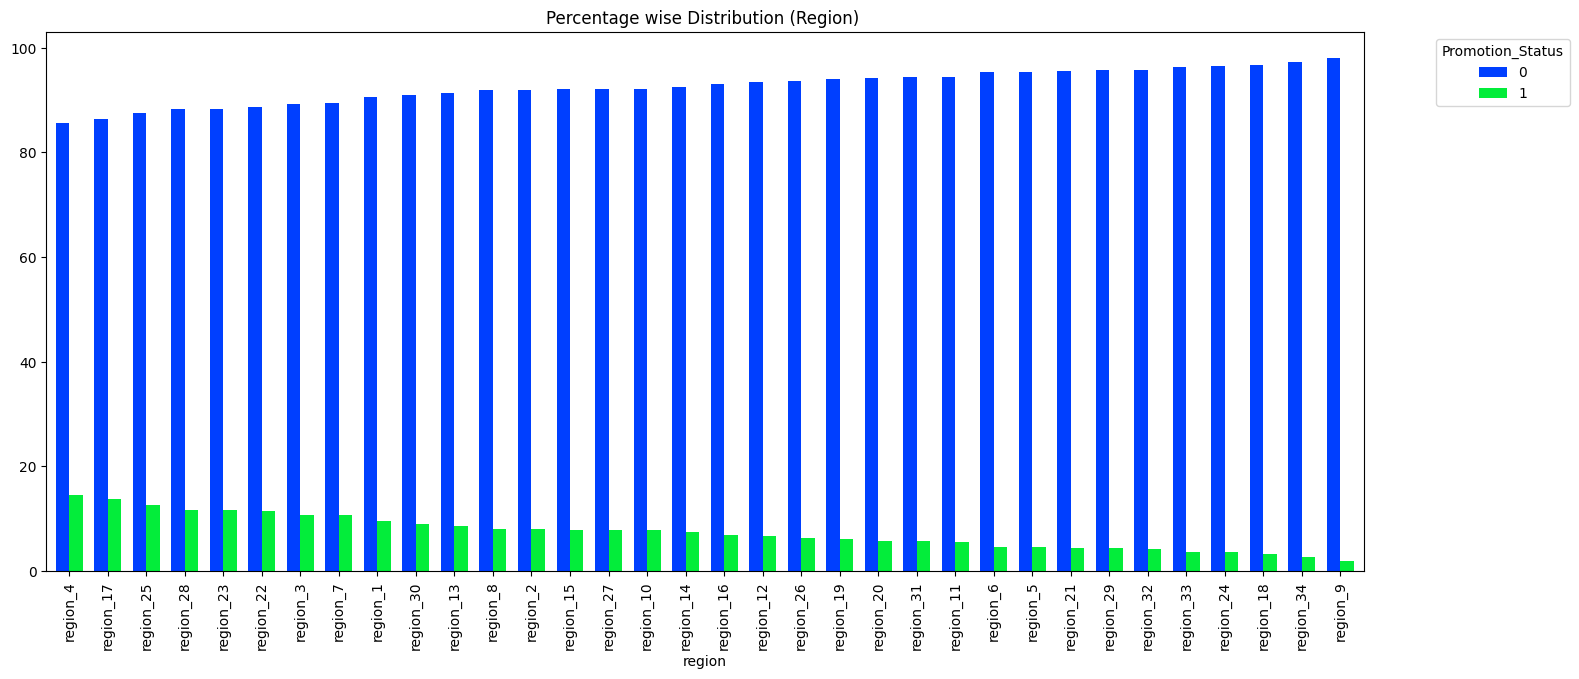

In [31]:
# plot for region in the
data = df.copy()
value = data[['is_promoted','region']].groupby(['region']).value_counts(normalize=True).unstack()
percent = value*100
percent.sort_values(by = 1,ascending = False,inplace = True)

ax = percent.plot(kind='bar',figsize=(17,7),width = 0.7)


plt.xticks(rotation=90)
plt.legend(title='Promotion_Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Percentage wise Distribution (Region) ')

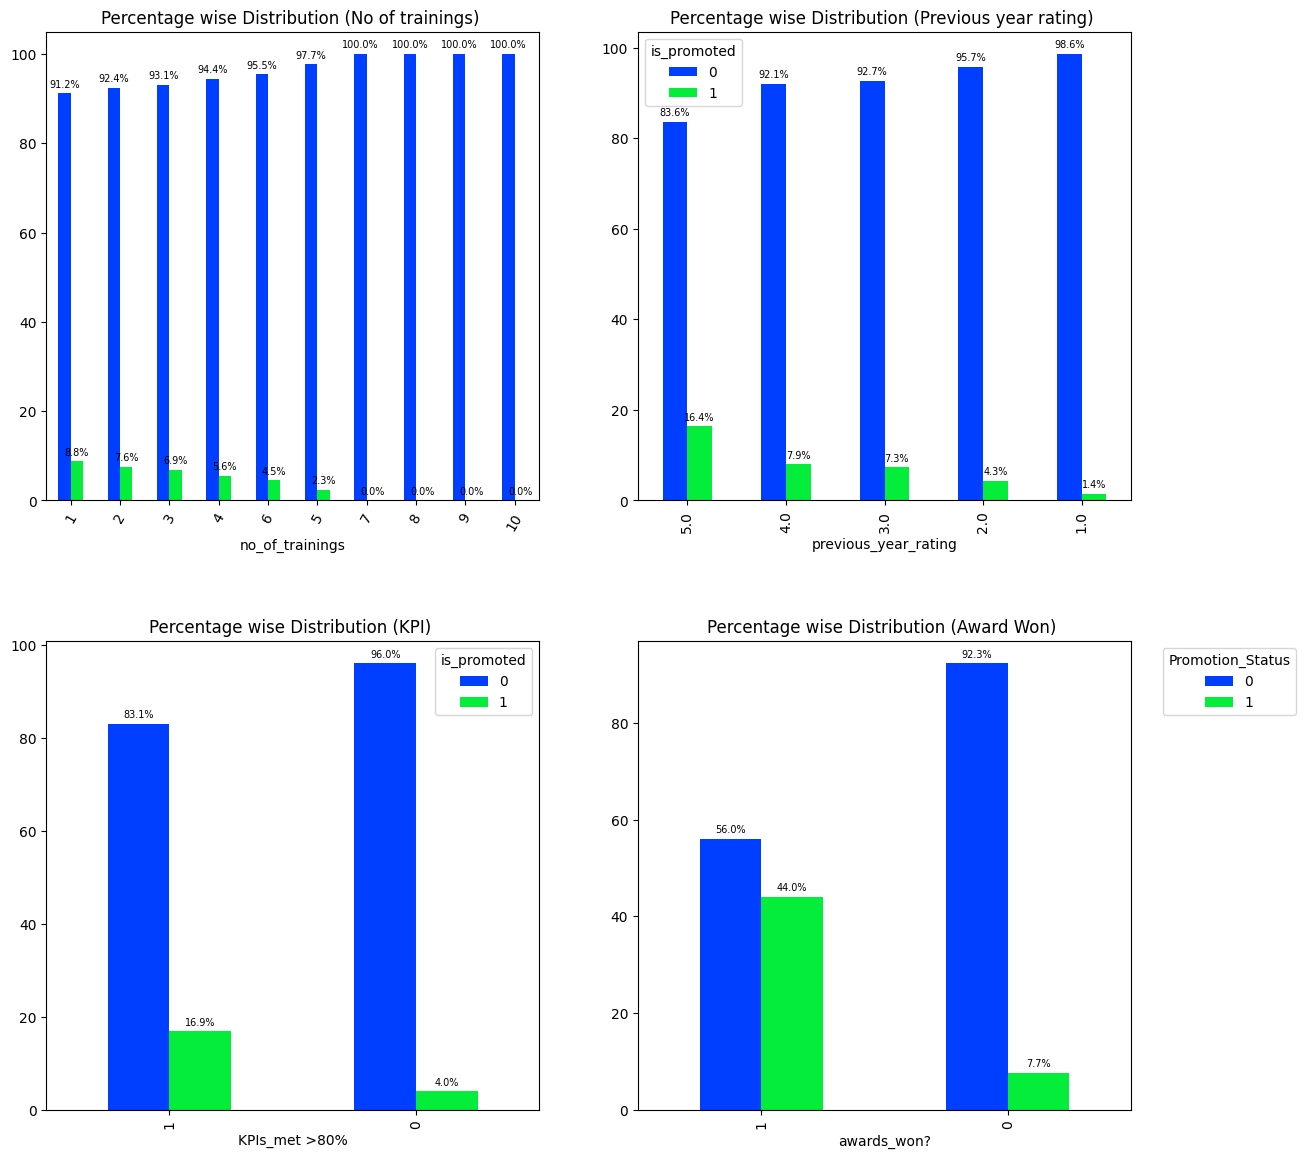

In [32]:
# figure with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(14,14))




# Adjusting space between plots
plt.subplots_adjust(wspace=0.2,hspace= 0.3)

# plot for No.of Training in the first row, first column
data = df.copy()
value = data[['is_promoted', 'no_of_trainings']].groupby(['no_of_trainings']).value_counts(normalize=True).unstack()
percent = value * 100
percent.sort_values(by = 1,ascending = False,inplace = True)

ax = percent.plot(kind='bar',ax = axes[0,0])
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=7, padding=3, labels=[f'{x:.1f}%' for x in container.datavalues])
plt.legend(title='Promotion_Status', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,0].set_title('Percentage wise Distribution (No of trainings) ')

# plot for Previous Yrear Rating  in the first row, second column
data = df.copy()
value = data[['is_promoted', 'previous_year_rating']].groupby(['previous_year_rating']).value_counts(normalize=True).unstack()
percent = value * 100
percent.sort_values(by = 1,ascending = False,inplace = True)

ax = percent.plot(kind='bar',ax = axes[0,1])
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=7, padding=3, labels=[f'{x:.1f}%' for x in container.datavalues])
plt.legend(title='Promotion_Status', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,1].set_title('Percentage wise Distribution (Previous year rating) ')

# plot for KPI met in the second row, first column
data = df.copy()
value = data[['is_promoted', 'KPIs_met >80%']].groupby(['KPIs_met >80%']).value_counts(normalize=True).unstack()
percent = value * 100
percent.sort_values(by = 1,ascending = False,inplace = True)

ax = percent.plot(kind='bar',ax = axes[1,0])
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=7, padding=3, labels=[f'{x:.1f}%' for x in container.datavalues])
plt.legend(title='Promotion_Status', bbox_to_anchor=(2, 1), loc='upper left')
axes[1,0].set_title('Percentage wise Distribution (KPI) ')

# plot for Awards Won in the second row, second column
data = df.copy()
value = data[['is_promoted', 'awards_won?']].groupby(['awards_won?']).value_counts(normalize=True).unstack()
percent = value * 100
percent.sort_values(by = 1,ascending = False,inplace = True)

ax = percent.plot(kind='bar',ax = axes[1,1])
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=7, padding=3, labels=[f'{x:.1f}%' for x in container.datavalues])
plt.legend(title='Promotion_Status', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1,1].set_title('Percentage wise Distribution (Award Won) ')



# Rotate x-axis labels by 90 degrees
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=60)
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=90)

# removing Legend
axes[0,0].get_legend().remove()

plt.show()

## ## Percentage wise Analysis of Promotion Status

In [33]:
data = df.copy()

In [34]:
#Create the 'Age_Category' column to create bins
bins = [20, 30, 40, 50, 60,]
data['Age_Category'] = pd.cut(data['age'], bins=bins, labels=['20-29', '30-39', '40-49', '50-60'])


In [35]:
#Create the 'Score_catagory' column to create bins
bins = [ 39, 49, 59, 69,79,89,99]

data['Score_Category'] = pd.cut(data['avg_training_score'], bins=bins, labels=['39-49', '50-59', '60-69', '70-79','80-99','90-99'])


In [36]:
#Create the 'Service Lenght' column to create bins
bins = [1,7,14,21,28,35]
data['Service Lenght'] = pd.cut(data['length_of_service'], bins=bins, labels=['1-7', '8-14', '15-21', '22-28', '29-37'])

In [37]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'Age_Category', 'Score_Category',
       'Service Lenght'],
      dtype='object')

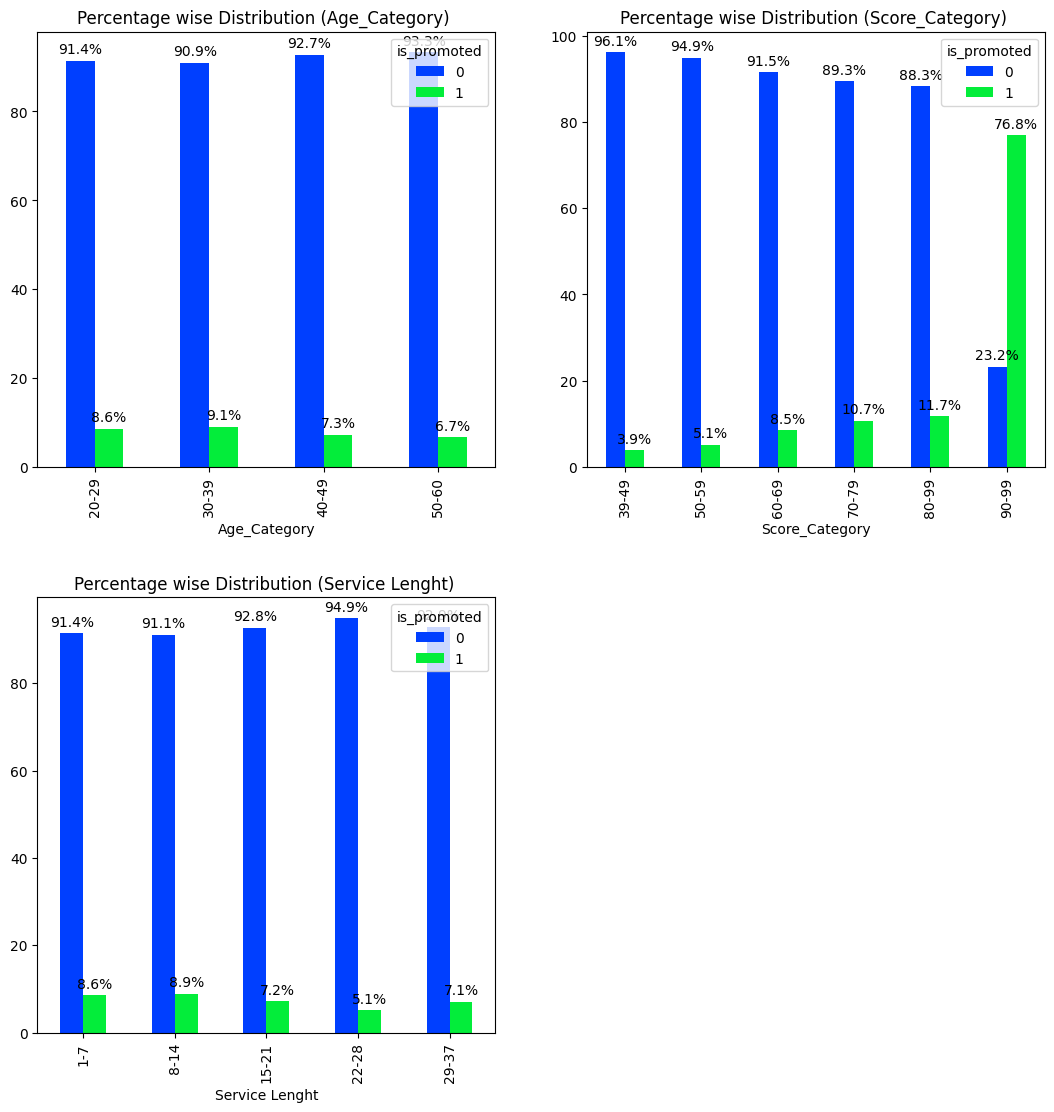

In [38]:
# figure with 3 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(13,13))




# Adjusting space between plots
plt.subplots_adjust(wspace=0.2,hspace= 0.3)

# plot for Age in the first row, first column


value = data[['is_promoted', 'Age_Category']].groupby(['Age_Category']).value_counts(normalize=True).unstack()
percent = value * 100


ax = percent.plot(kind='bar',ax = axes[0,0])
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3, labels=[f'{x:.1f}%' for x in container.datavalues])
plt.legend(title='Promotion_Status', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,0].set_title('Percentage wise Distribution (Age_Category) ')

# plot for Avg Score in the first row, second column

value = data[['is_promoted', 'Score_Category']].groupby(['Score_Category']).value_counts(normalize=True).unstack()
percent = value * 100


ax = percent.plot(kind='bar',ax = axes[0,1])
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3, labels=[f'{x:.1f}%' for x in container.datavalues])
plt.legend(title='Promotion_Status', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,1].set_title('Percentage wise Distribution (Score_Category) ')

# plot for Service Lenght in the second row, first column


value = data[['is_promoted', 'Service Lenght']].groupby(['Service Lenght']).value_counts(normalize=True).unstack()
percent = value * 100


ax = percent.plot(kind='bar',ax = axes[1,0])
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3, labels=[f'{x:.1f}%' for x in container.datavalues])
plt.legend(title='Promotion_Status', bbox_to_anchor=(2, 2), loc='upper left')
axes[1,0].set_title('Percentage wise Distribution (Service Lenght) ')

# deleting unused plot
fig.delaxes(axes[1,1])



plt.show()

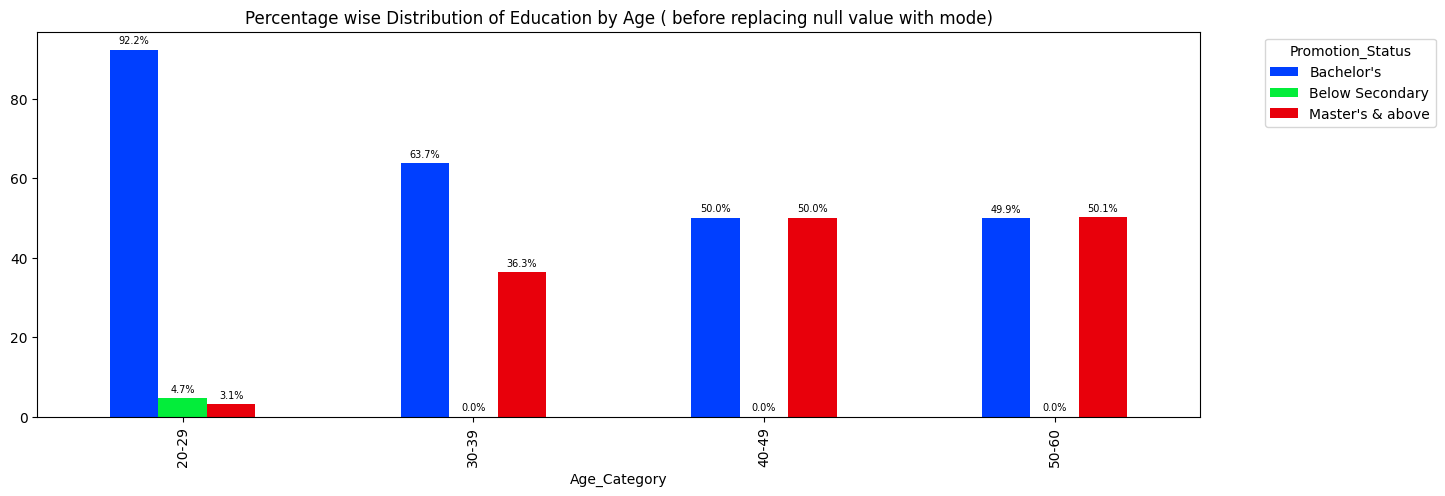

In [39]:
## Without filling null value (Percentage)
value = data[['education', 'Age_Category']].groupby(['Age_Category']).value_counts(normalize = True).unstack()
value =value*100
# Plot Distribution Education to age before filling Null value for education
ax=value.plot(kind='bar',figsize=(15,5),title = 'Percentage wise Distribution of Education by Age ( before replacing null value with mode)')
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=7, padding=3, labels=[f'{x:.1f}%' for x in container.datavalues])
plt.legend(title='Promotion_Status', bbox_to_anchor=(1.05, 1), loc='upper left')

In [40]:
HR_set = df[df['is_promoted']==1]

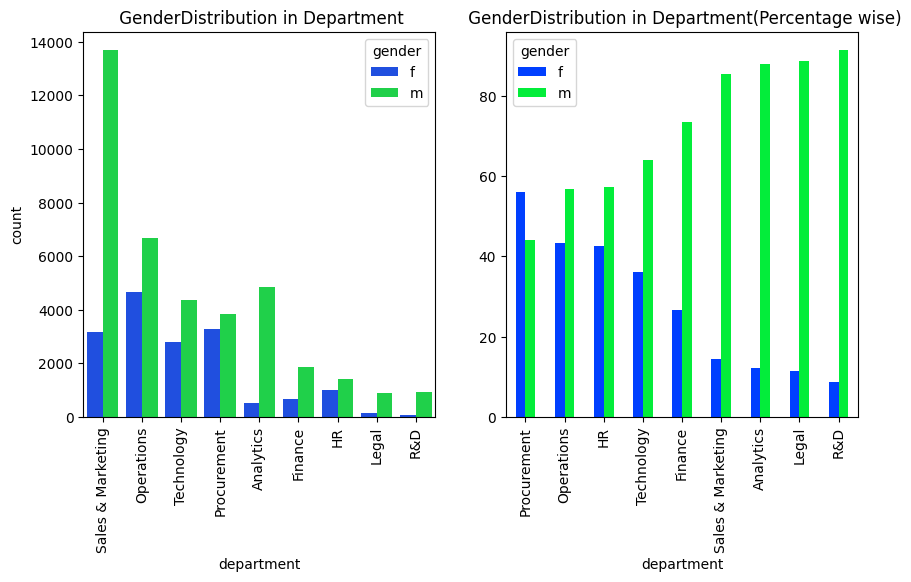

In [41]:
# Analysing the Promotion Rate of men and Women in each Department

fig, axes = plt.subplots(1, 2, figsize=(10,5))

#Plot for male female employes in Department
sns.countplot(data=df, x='department',hue=df['gender'],ax=axes[0],order=df['department'].value_counts().index)
axes[0].set_title(' GenderDistribution in Department')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
# Plot for gender based promotion rate in departments
promoted =  HR_set.pivot_table(index='department', columns='gender', aggfunc='size')
promoted_percentage = promoted.div(promoted.sum(axis=1), axis=0) * 100
promoted_percentage.sort_values(by = 'f',ascending = False,inplace = True)

ax = promoted_percentage.plot(kind='bar',ax =axes[1])


axes[1].set_title(' GenderDistribution in Department(Percentage wise)')

plt.show()

In [42]:
promoted_percentage

gender,f,m
department,,
Procurement,55.959302,44.040698
Operations,43.206256,56.793744
HR,42.647059,57.352941
Technology,36.067708,63.932292
Finance,26.699029,73.300971
Sales & Marketing,14.509481,85.490519
Analytics,12.109375,87.890625
Legal,11.320755,88.679245
R&D,8.695652,91.304348


Text(0.5, 1.0, 'Ratio of Promotion based on Education in each age group')

<Figure size 1000x500 with 0 Axes>

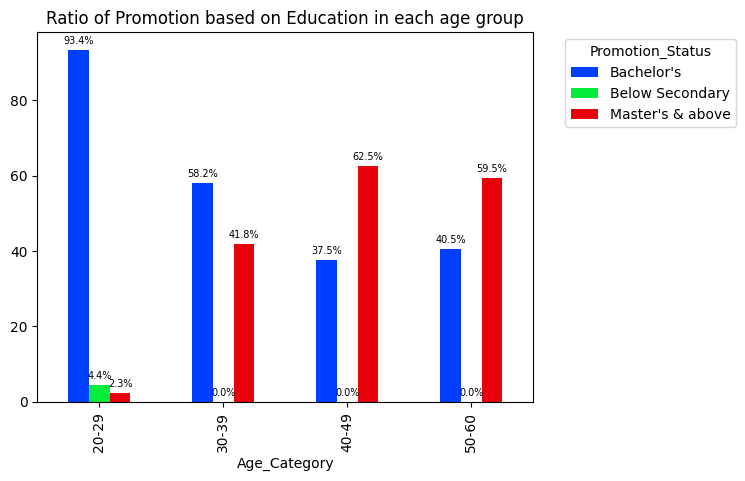

In [43]:
# Anlysing the Ratio of Promotion based on Education in each age group
HR = data[['education','Age_Category','is_promoted']]
HR = HR[HR['is_promoted']==1]
Grouped_Age =HR.pivot_table(index='Age_Category', columns='education', aggfunc='size')
percentage = Grouped_Age.div(Grouped_Age.sum(axis=1), axis=0) * 100
# Ploting  Graph
plt.figure(figsize=(10, 5))
ax = percentage.plot(kind='bar',)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=7, padding=3, labels=[f'{x:.1f}%' for x in container.datavalues])
plt.legend(title='Promotion_Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Ratio of Promotion based on Education in each age group')



In [44]:
HR.nunique()

education       3
Age_Category    4
is_promoted     1
dtype: int64

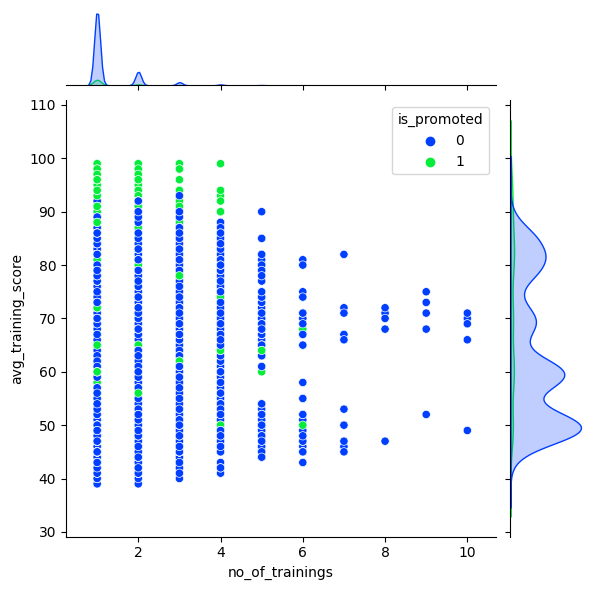

In [45]:
sns.jointplot(x=df['no_of_trainings'],y=df['avg_training_score'], hue=df['is_promoted'])

# Pre-Processing

### Null value Handleing

In [46]:




# identifying null values
df.isna().mean()*100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [47]:
## creating Dataframe for null values
rating_null = df[df['previous_year_rating'].isna()]
rating_null

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0
23,71177,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,0,70,0
29,74759,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,0,44,0
56,45709,Sales & Marketing,region_31,Bachelor's,f,other,1,29,NaN,1,0,0,49,0
58,26599,Sales & Marketing,region_16,Bachelor's,m,other,2,27,NaN,1,1,0,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54703,74615,R&D,region_31,Bachelor's,m,sourcing,1,30,NaN,1,1,0,88,0
54734,11685,Operations,region_15,Bachelor's,m,sourcing,1,31,NaN,1,1,0,56,1
54746,10546,Finance,region_6,Bachelor's,m,other,1,28,NaN,1,1,0,61,0
54773,37919,Finance,region_2,Bachelor's,m,other,1,23,NaN,1,1,0,61,0


In [48]:
data  = df.copy()

data['previous_year_rating']=np.where(data['previous_year_rating'].isnull(),1,0)


In [49]:
data[['length_of_service','previous_year_rating']].groupby('length_of_service').sum()

,previous_year_rating
length_of_service,
1,4124
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


<Axes: xlabel='age'>

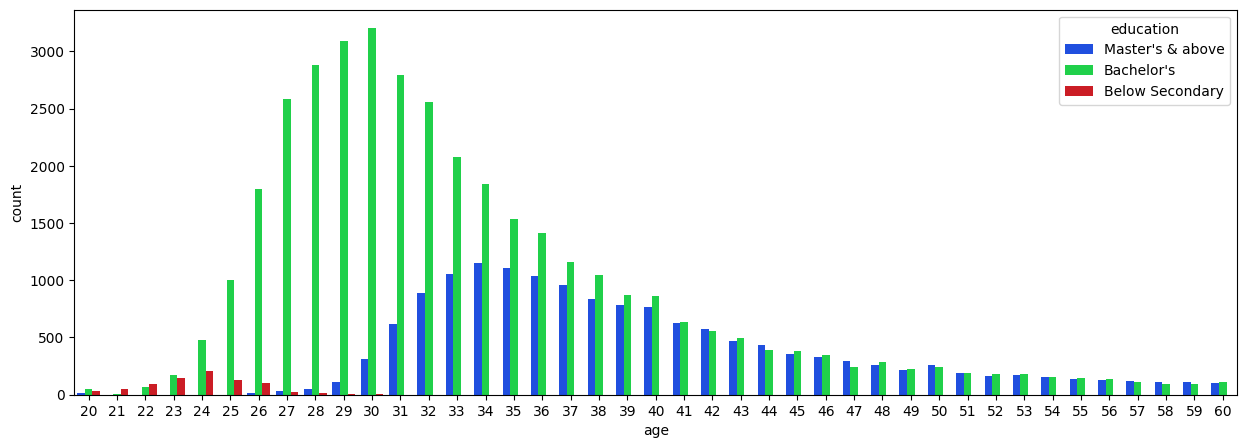

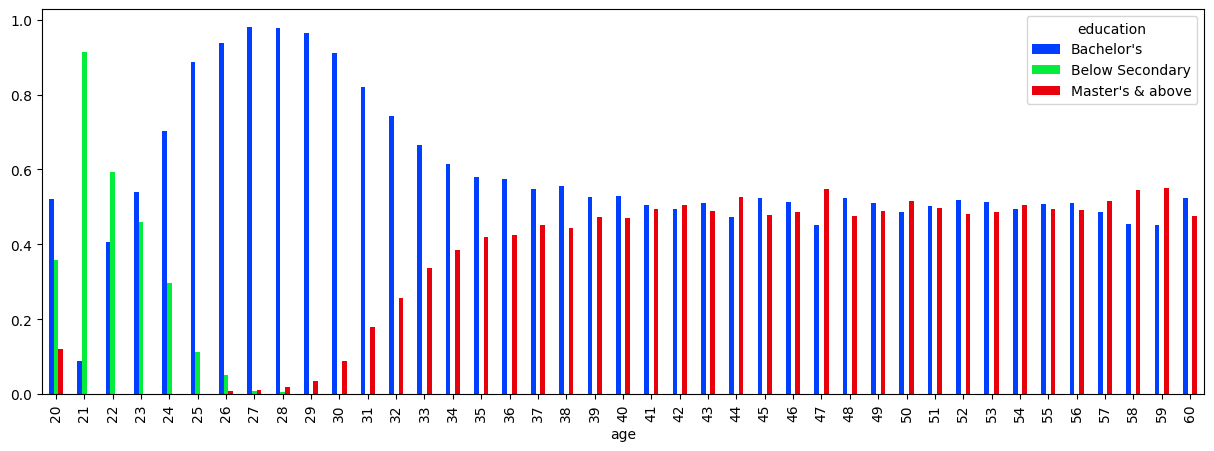

In [50]:
## To check relationship between education and age
plt.figure(figsize=(15,5))
## count plot
sns.countplot(x=df['age'],data = Df,hue=Df['education'])

# percentage plot
value = Df[['education', 'age']].groupby(['age']).value_counts(normalize = True).unstack()
value.plot(kind='bar',figsize=(15,5))

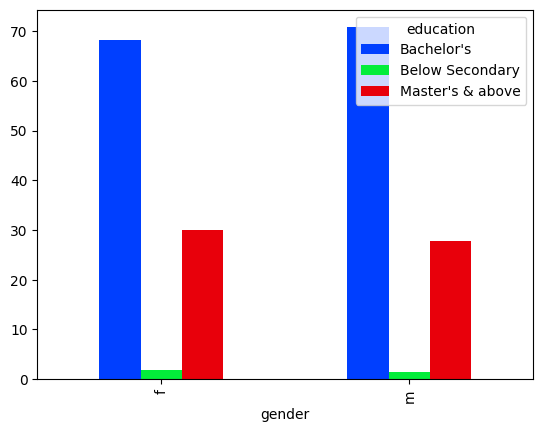

In [51]:
## to check relation ship between gender and education
# percentage plot
value = df[['education', 'gender']].groupby(['gender']).value_counts(normalize=True).unstack()
percent = value * 100

ax = percent.plot(kind='bar')

In [52]:
## Replacing missing values in educatuion with mode as missing value is only 4.3%
df['education'].fillna(df['education'].mode()[0],inplace =True)
## Replacing Null values in previous_year_rating  with 0 as lenght of service is 1 year for employees for them i.e they are new employees
df['previous_year_rating'].fillna(0,inplace=True)


<Axes: title={'center': 'Distribution of Education by Age ( after replacing null value with mode)'}, xlabel='age'>

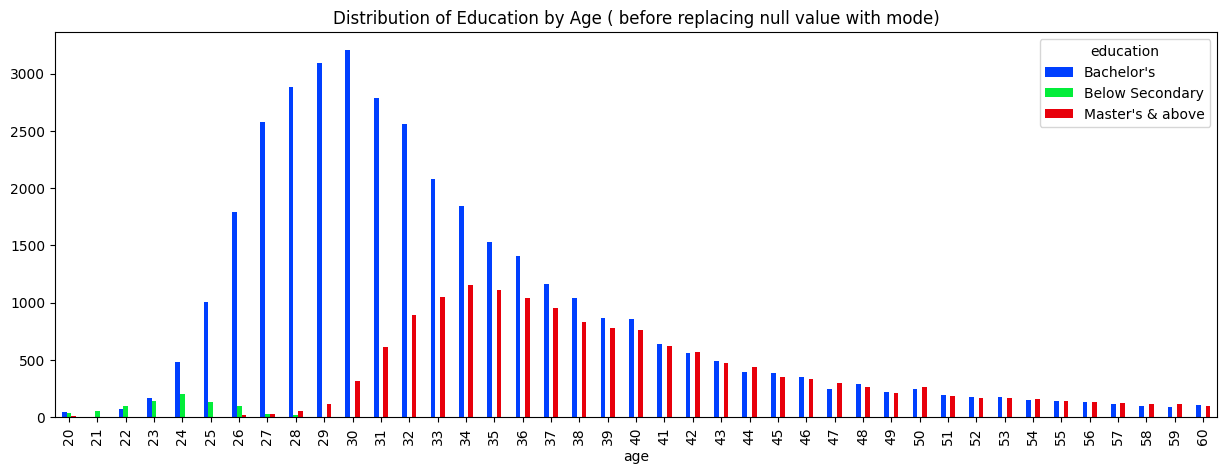

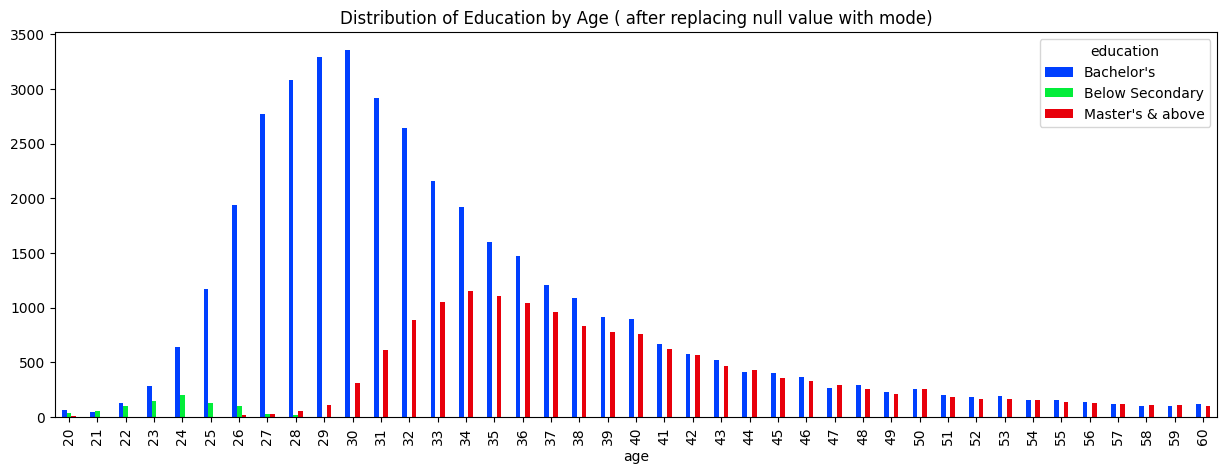

In [53]:
## Distribution of data with before and after replacing nul values with mode in education
## Without filling null value
value = Df[['education', 'age']].groupby(['age']).value_counts().unstack()
#  filling null value with mode
value1 = df[['education', 'age']].groupby(['age']).value_counts().unstack()
# Plot Distribution Education to age before filling Null value for education
value.plot(kind='bar',figsize=(15,5),title = 'Distribution of Education by Age ( before replacing null value with mode)')
# Plot Distribution Education to age  after  filling Null value for education with mode
value1.plot(kind='bar',figsize=(15,5),title = 'Distribution of Education by Age ( after replacing null value with mode)')

<Axes: title={'center': 'Percentage wise Distribution of Education by Age ( after replacing null value with mode)'}, xlabel='age'>

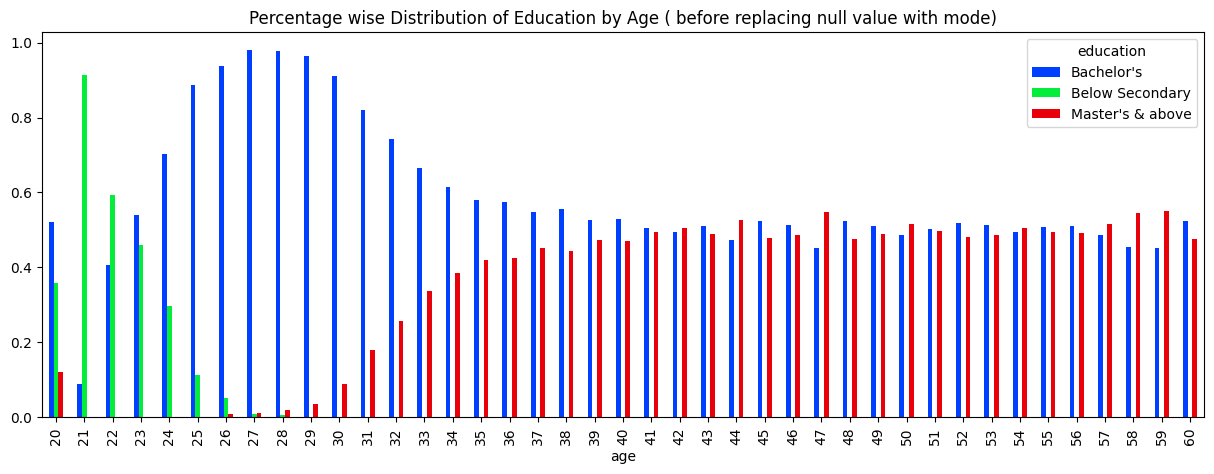

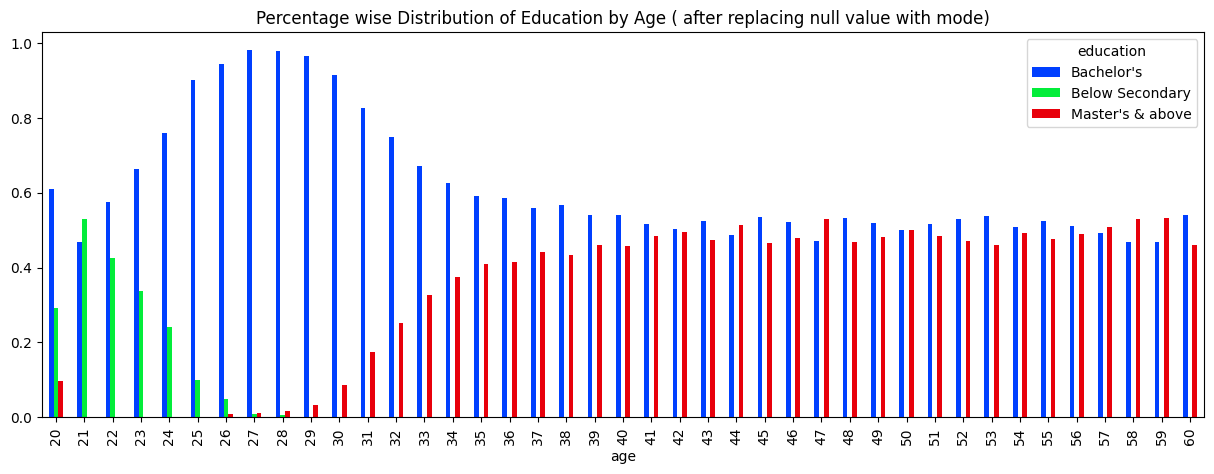

In [54]:
## Without filling null value (Percentage)
value = Df[['education', 'age']].groupby(['age']).value_counts(normalize = True).unstack()
#  filling null value with mode (Percentage)
value1 = df[['education', 'age']].groupby(['age']).value_counts(normalize = True).unstack()
# Plot Distribution Education to age before filling Null value for education
value.plot(kind='bar',figsize=(15,5),title = 'Percentage wise Distribution of Education by Age ( before replacing null value with mode)')
# Plot Distribution Education to age  after  filling Null value for education with mode
value1.plot(kind='bar',figsize=(15,5),title = 'Percentage wise Distribution of Education by Age ( after replacing null value with mode)')

In [55]:
df.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

### Encoding

In [56]:
## catagorical Column
len(cat_data), cat_data

(5, ['department', 'region', 'education', 'gender', 'recruitment_channel'])

In [57]:
## Finding Unique values
for feature in cat_data:
    print(feature ,":",df[feature].nunique())

department : 9
region : 34
education : 3
gender : 2
recruitment_channel : 3


In [58]:
df.education.unique()

array(["Master's & above", "Bachelor's", 'Below Secondary'], dtype=object)

In [59]:
##ordinal encoding education column
from sklearn.preprocessing import OrdinalEncoder


Education = ['Below Secondary',"Bachelor's","Master's & above"]

enc = OrdinalEncoder(categories=[Education])

df[['education']] = enc.fit_transform(df[['education']])

In [60]:
encoding_map = dict(zip(Education, df[['education']]))
print(encoding_map)

{'Below Secondary': 'education'}


In [61]:
enc.get_params

<bound method BaseEstimator.get_params of OrdinalEncoder(categories=[['Below Secondary', "Bachelor's",
                            "Master's & above"]])>

In [62]:
df.education.unique()

array([2., 1., 0.])

In [63]:
Df.education.unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [64]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,2.0,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,1.0,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,1.0,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,1.0,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,1.0,m,other,1,45,3.0,2,0,0,73,0


In [65]:
##onehotencoding on gender and recruitmentchannel Department
from numpy import int32
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False,dtype=int32,drop='first')
cols = df[['gender','recruitment_channel','department']]
onehot_encoded = ohe.fit_transform(cols)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [66]:
ohe

OneHotEncoder(drop='first', dtype=<class 'numpy.int32'>, sparse=False,
              sparse_output=False)

In [67]:
# Get the feature names
feature_names = ohe.get_feature_names_out(['gender', 'recruitment_channel','department'])
# Create a new DataFrame with the encoded data and feature names
df_encoded = pd.DataFrame(onehot_encoded, columns=feature_names)
# Concatenate the original DataFrame and the encoded DataFrame
df = pd.concat([df, df_encoded], axis=1)

In [68]:
# Droping columns 'gender','recruitment_channel','department'
df.drop(['gender','recruitment_channel','department'],axis=1,inplace=True)

In [69]:
df.head()

,employee_id,region,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,...,recruitment_channel_referred,recruitment_channel_sourcing,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology
0,65438,region_7,2.0,1,35,5.0,8,1,0,49,...,0,1,0,0,0,0,0,0,1,0
1,65141,region_22,1.0,1,30,5.0,4,0,0,60,...,0,0,0,0,0,1,0,0,0,0
2,7513,region_19,1.0,1,34,3.0,7,0,0,50,...,0,1,0,0,0,0,0,0,1,0
3,2542,region_23,1.0,2,39,1.0,10,0,0,50,...,0,0,0,0,0,0,0,0,1,0
4,48945,region_26,1.0,1,45,3.0,2,0,0,73,...,0,0,0,0,0,0,0,0,0,1


In [70]:
df.columns

Index(['employee_id', 'region', 'education', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted', 'gender_m',
       'recruitment_channel_referred', 'recruitment_channel_sourcing',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology'],
      dtype='object')

In [71]:
df.region.value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

In [72]:
## Encoding region with the region number
### extract number from region name

df['region'] = df['region'].str.extract('(\d+)')

## checkinf data type of column
df['region'].dtype


dtype('O')

In [73]:

## chenging dtype from string to int
df['region'] = df['region'].astype(int)
df['region'].dtype

dtype('int64')

In [74]:
df.head()

,employee_id,region,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,...,recruitment_channel_referred,recruitment_channel_sourcing,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology
0,65438,7,2.0,1,35,5.0,8,1,0,49,...,0,1,0,0,0,0,0,0,1,0
1,65141,22,1.0,1,30,5.0,4,0,0,60,...,0,0,0,0,0,1,0,0,0,0
2,7513,19,1.0,1,34,3.0,7,0,0,50,...,0,1,0,0,0,0,0,0,1,0
3,2542,23,1.0,2,39,1.0,10,0,0,50,...,0,0,0,0,0,0,0,0,1,0
4,48945,26,1.0,1,45,3.0,2,0,0,73,...,0,0,0,0,0,0,0,0,0,1


### Detection of Outlier

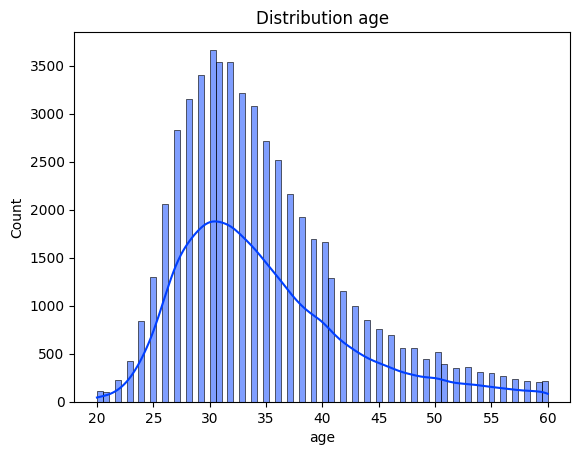

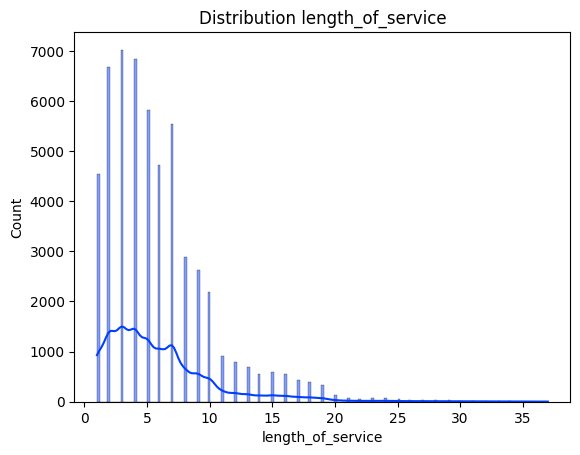

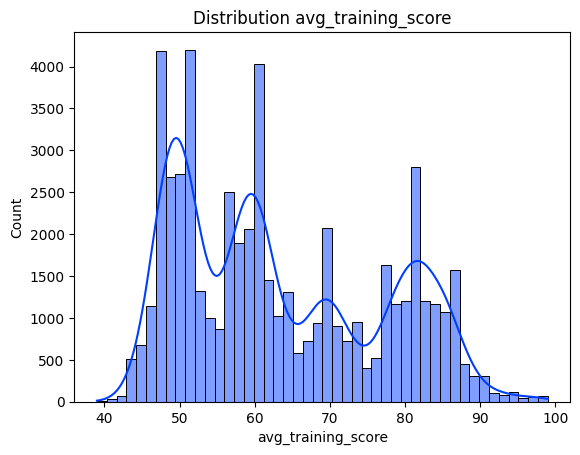

In [75]:
for feature in conti_col:
    data = df.copy()
    sns.histplot(data[feature],kde=True)

    plt.xlabel(feature)
    plt.title('Distribution ' + feature)
    plt.show()

In [76]:
print('Age Skewness: ',df['age'].skew())
print('length_of_service Skewness: ',df['length_of_service'].skew())
print('avg_training_score: ',df['avg_training_score'].skew())

Age Skewness:  1.0074317710382241
length_of_service Skewness:  1.738061458740809
avg_training_score:  0.45190808551707995


In [77]:
conti_col


['age', 'length_of_service', 'avg_training_score']

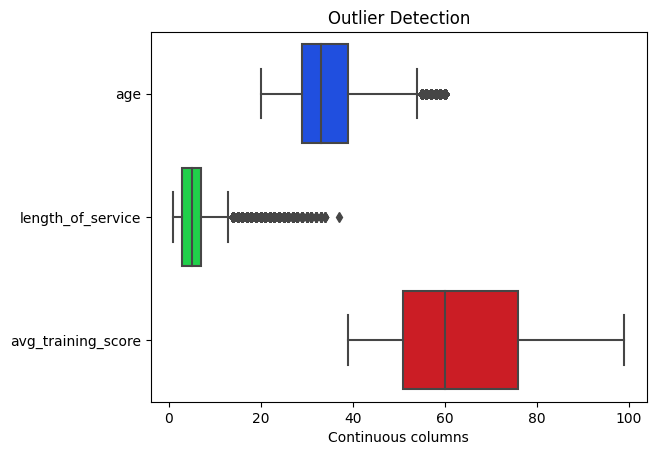

In [78]:


sns.boxplot(df[['age','length_of_service','avg_training_score']],orient='h')

plt.xlabel('Continuous columns')
plt.title('Outlier Detection')
plt.show()

There are no outlier in average taining score, outliers are present in lenght of service amd age

In [79]:
## describtive statiscs to find mean,std,min,max,25 percentile,50 percentile,75percentile
df[['age', 'length_of_service']].describe()

,age,length_of_service
count,54808.000000,54808.000000
mean,34.803915,5.865512
std,7.660169,4.265094
min,20.000000,1.000000
25%,29.000000,3.000000
50%,33.000000,5.000000
75%,39.000000,7.000000
max,60.000000,37.000000


In [80]:

### 25 percentile
age_percentile25 = df['age'].quantile(0.25)
sl_percentile25 = df['length_of_service'].quantile(0.25)
age_percentile25,sl_percentile25

(29.0, 3.0)

In [81]:
### 75 percentile
age_percentile75 = df['age'].quantile(0.75)
sl_percentile75 = df['length_of_service'].quantile(0.75)
age_percentile75,sl_percentile75

(39.0, 7.0)

In [82]:
### Finding IQR
IQR_age = age_percentile75-age_percentile25
IQR_sl = sl_percentile75-sl_percentile25
IQR_age,IQR_sl

(10.0, 4.0)

In [83]:
## Upper and lower limit of Age
age_upper = age_percentile75+1.5*IQR_age
age_lower = age_percentile25-1.5*IQR_age
age_upper,age_lower

(54.0, 14.0)

In [84]:
## Upper and lower limit of Length of service
sl_upper = sl_percentile75+1.5*IQR_sl
sl_lower = sl_percentile25-1.5*IQR_sl
sl_upper,sl_lower

(13.0, -3.0)

In [85]:
## copying outliers from  datafram to new dataframe
age_out = df[(df['age']<age_lower)|(df['age']>age_upper)]
sl_out = df[(df['length_of_service']<sl_lower)|(df['length_of_service']>sl_upper)]

In [86]:
age_out.shape, age_out.age.unique()


((1435, 22), array([57, 59, 56, 60, 58, 55]))

In [87]:

sl_out.shape, sl_out.length_of_service.unique()

((3489, 22),
 array([16, 26, 17, 14, 19, 15, 23, 18, 20, 22, 25, 28, 24, 31, 21, 29, 30,
        34, 27, 33, 32, 37]))

In [88]:
print('percent of Age outlier in data : ',len(age_out)/len(df)*100)
print('percent of Length of Service outlier in data : ',len(sl_out)/len(df)*100)

percent of Age outlier in data :  2.618230915194862
percent of Length of Service outlier in data :  6.365858998686323


### Feature Engineering

In [89]:
#Creating a acheivement metric column
df['acheivement_metric'] =  df['previous_year_rating'].astype(str)+df['awards_won?'].astype(str)

# changing String to integer\
df['acheivement_metric'] = df['acheivement_metric'].astype(float)
# creating a total score column
df['total_score'] = df['avg_training_score'] * df['no_of_trainings']

In [90]:
df.head()

,employee_id,region,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,...,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,acheivement_metric,total_score
0,65438,7,2.0,1,35,5.0,8,1,0,49,...,0,0,0,0,0,0,1,0,5.0,49
1,65141,22,1.0,1,30,5.0,4,0,0,60,...,0,0,0,1,0,0,0,0,5.0,60
2,7513,19,1.0,1,34,3.0,7,0,0,50,...,0,0,0,0,0,0,1,0,3.0,50
3,2542,23,1.0,2,39,1.0,10,0,0,50,...,0,0,0,0,0,0,1,0,1.0,100
4,48945,26,1.0,1,45,3.0,2,0,0,73,...,0,0,0,0,0,0,0,1,3.0,73


In [91]:
value = df[['is_promoted','acheivement_metric']].groupby(['acheivement_metric']).value_counts(normalize = True).unstack()
percent = value*100

percent.sort_values(by = 1,ascending = False,inplace = True)


Text(0.5, 1.0, 'Percentage wise Promotion Status(Acheivement mertic) ')

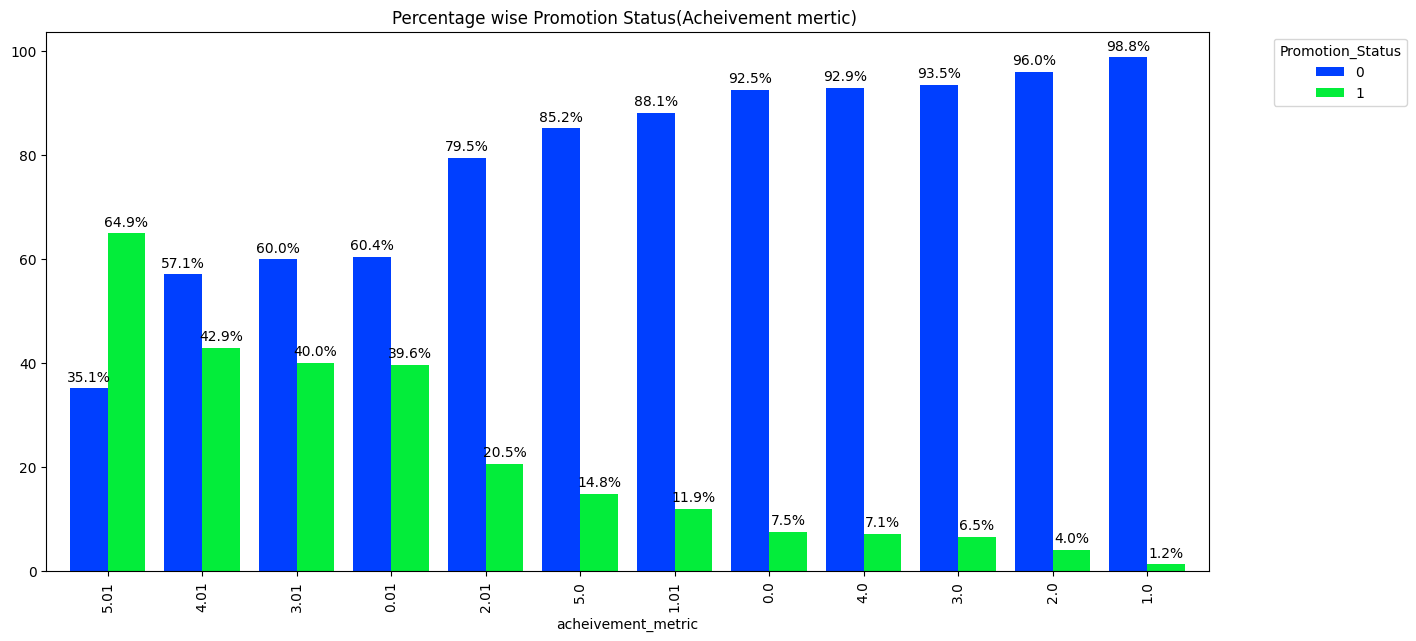

In [92]:

ax = percent.plot(kind='bar',figsize = (15,7),width=0.8)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3, labels=[f'{x:.1f}%' for x in container.datavalues])
plt.legend(title='Promotion_Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Percentage wise Promotion Status(Acheivement mertic) ')


<Axes: ylabel='total_score'>

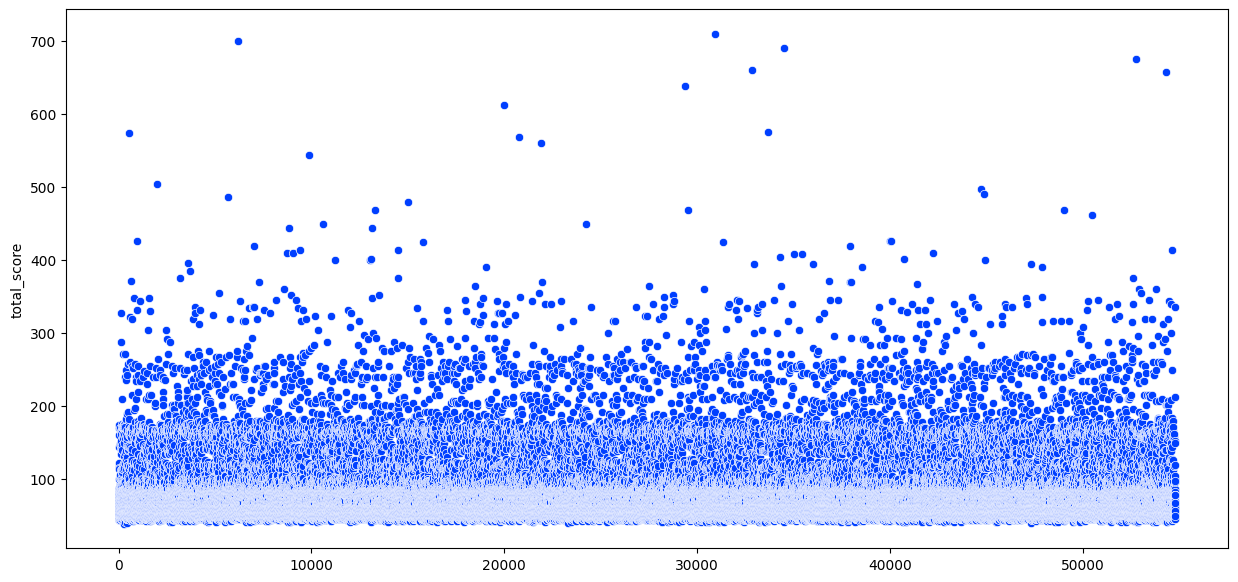

In [93]:
    plt.figure(figsize=(15,7))

    sns.scatterplot(df['total_score'])





<Axes: xlabel='no_of_trainings', ylabel='total_score'>

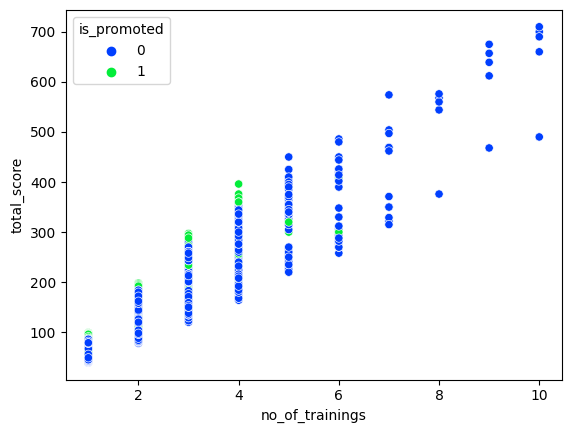

In [94]:
sns.scatterplot(x =df['no_of_trainings'],y = df['total_score'],data = df,hue = df['is_promoted'])

In [95]:
df['total_score'].max()

710

In [96]:
#Create the 'Score_catagory' column to create bins
bins = np.linspace(39, 710, num=10).astype(int)

df['Binned Score'] = pd.cut(df['total_score'], bins=bins)

Text(0.5, 1.0, 'Percentage wise Distribution (Score_Category) ')

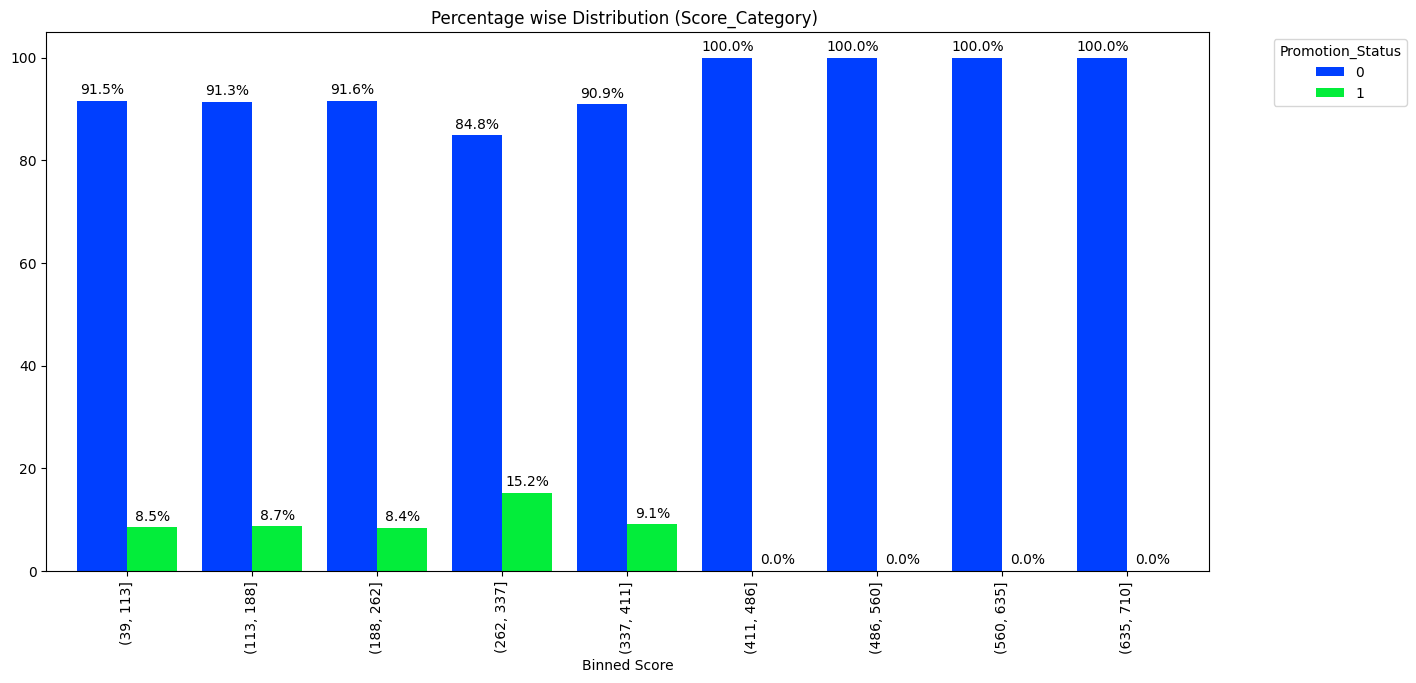

In [97]:
value = df[['is_promoted', 'Binned Score']].groupby(['Binned Score']).value_counts(normalize=True).unstack()
percent = value * 100


ax = percent.plot(kind='bar',figsize = (15,7),width=0.8)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3, labels=[f'{x:.1f}%' for x in container.datavalues])
plt.legend(title='Promotion_Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Percentage wise Distribution (Score_Category) ')

## Feature Reduction

In [100]:
df['employee_id'].nunique()

54808

In [101]:
## dropping EMployee ID as it has all unique id (54808) amd it does not has any corretaion with target variable

df.drop('employee_id',axis = 1,inplace = True)

##  Feature Scaling

In [103]:
# Using Standardization for Scaling

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [104]:
conti_col

['age', 'length_of_service', 'avg_training_score']

In [105]:
cols = df[['avg_training_score']]
scaled = scalar.fit_transform(cols)

In [106]:
## Droping unscaled columns
df.drop(['avg_training_score'],axis =1,inplace = True)
# Create a new DataFrame with the encoded data and feature names
scaled_col = pd.DataFrame(scaled, columns=['avg_training_score'])
# Concatenate the original DataFrame and the encoded DataFrame
df = pd.concat([df, scaled_col], axis=1)

In [107]:
np.round(scaled_col.describe(),1)

,avg_training_score
count,54808.0
mean,-0.0
std,1.0
min,-1.8
25%,-0.9
50%,-0.3
75%,0.9
max,2.7


In [108]:
df.head()

,region,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,is_promoted,gender_m,...,recruitment_channel_sourcing,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,avg_training_score
0,7,2.0,1,35,5.0,8,1,0,0,0,...,1,0,0,0,0,0,0,1,0,-1.075931
1,22,1.0,1,30,5.0,4,0,0,0,1,...,0,0,0,0,1,0,0,0,0,-0.253282
2,19,1.0,1,34,3.0,7,0,0,0,1,...,1,0,0,0,0,0,0,1,0,-1.001145
3,23,1.0,2,39,1.0,10,0,0,0,1,...,0,0,0,0,0,0,0,1,0,-1.001145
4,26,1.0,1,45,3.0,2,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0.718939


In [109]:
np.round(df.describe(),1)

,region,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,is_promoted,gender_m,...,recruitment_channel_sourcing,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,avg_training_score
count,54808.0,54808.0,54808.0,54808.0,54808.0,54808.0,54808.0,54808.0,54808.0,54808.0,...,54808.0,54808.0,54808.0,54808.0,54808.0,54808.0,54808.0,54808.0,54808.0,54808.0
mean,14.2,1.3,1.3,34.8,3.1,5.9,0.4,0.0,0.1,0.7,...,0.4,0.0,0.0,0.0,0.2,0.1,0.0,0.3,0.1,-0.0
std,10.1,0.5,0.6,7.7,1.5,4.3,0.5,0.2,0.3,0.5,...,0.5,0.2,0.2,0.1,0.4,0.3,0.1,0.5,0.3,1.0
min,1.0,0.0,1.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.8
25%,4.0,1.0,1.0,29.0,2.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.9
50%,13.0,1.0,1.0,33.0,3.0,5.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.3
75%,22.0,2.0,1.0,39.0,4.0,7.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.9
max,34.0,2.0,10.0,60.0,5.0,37.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.7


In [110]:
df.columns

Index(['region', 'education', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?', 'is_promoted',
       'gender_m', 'recruitment_channel_referred',
       'recruitment_channel_sourcing', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'avg_training_score'],
      dtype='object')

# Model Selection

In [111]:
x=df.drop(['is_promoted'],axis=1)
y=df['is_promoted']

In [112]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state =42,test_size=0.33)

In [113]:
df.columns

Index(['region', 'education', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?', 'is_promoted',
       'gender_m', 'recruitment_channel_referred',
       'recruitment_channel_sourcing', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'avg_training_score'],
      dtype='object')

### Balancing the dataset

In [114]:
from imblearn.combine import SMOTETomek
sm = SMOTETomek(random_state=0)
x_train_sm,y_train_sm = sm.fit_resample(x_train,y_train)

In [115]:
from collections import Counter

print('original dataset shape {}'.format(sorted(Counter(y_train).items())))
print('Resampled dataset shape {}'.format(sorted(Counter(y_train_sm).items())))

original dataset shape [(0, 33527), (1, 3194)]
Resampled dataset shape [(0, 33468), (1, 33468)]


<Axes: xlabel='is_promoted', ylabel='count'>

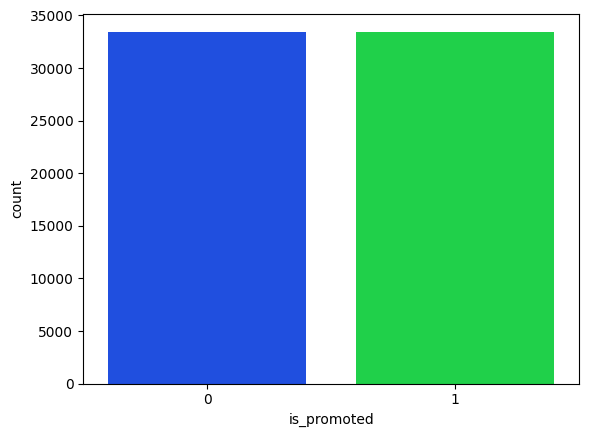

In [116]:
sns.countplot(x =y_train_sm)

### Testing with different models

In [117]:
# import necessary libraries and fitting with different models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score

In [118]:

models=  {'RandomForestClassifier':RandomForestClassifier(),
          'LogisticRegression':LogisticRegression(),
          'KNeighborsClassifier':KNeighborsClassifier(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'BernoulliNB':BernoulliNB(),
          'GaussianNB':GaussianNB(),
          'XGBClassifier':XGBClassifier()}

for name,model in models.items():
    model.fit(x_train,y_train)
    print(name+'  trained')

RandomForestClassifier  trained


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression  trained
KNeighborsClassifier  trained
DecisionTreeClassifier  trained
BernoulliNB  trained
GaussianNB  trained
XGBClassifier  trained


In [119]:
isinstance(x_test, np.ndarray)

False

In [120]:
model_test_acc=[]
model_test_recall_score=[]
model_test_f1_score=[]
model_test_precision_score=[]
model_conf_mat=[]
#checking the scores of classifiers
for name,model in models.items():
    y_pred=model.predict(x_test)
    model_test_acc.append(accuracy_score(y_test,y_pred))
    model_test_recall_score.append(recall_score(y_test,y_pred))
    model_test_f1_score.append(f1_score(y_test,y_pred))
    model_test_precision_score.append(precision_score(y_test,y_pred))
    model_conf_mat.append(confusion_matrix(y_test,y_pred))
confusion_matrix3={'Random Forest':model_conf_mat[0],
                  'Logistic regression':model_conf_mat[1],
                  'KNN':model_conf_mat[2],
                  'DecisionTree':model_conf_mat[3],
                  'BernolliNB':model_conf_mat[4],
                  'GaussianNB':model_conf_mat[5],
                  'XGBClassifier':model_conf_mat[6],
                 }
confusion_matrix3

{'Random Forest': array([[16533,    80],
        [ 1021,   453]]),
 'Logistic regression': array([[16499,   114],
        [ 1227,   247]]),
 'KNN': array([[16496,   117],
        [ 1434,    40]]),
 'DecisionTree': array([[15549,  1064],
        [  819,   655]]),
 'BernolliNB': array([[16494,   119],
        [ 1383,    91]]),
 'GaussianNB': array([[16029,   584],
        [ 1224,   250]]),
 'XGBClassifier': array([[16548,    65],
        [  944,   530]])}

In [121]:
Models = ['Random Forest','Logistic regression','KNN','DecisionTree','BernolliNB','GaussianNB','XGBClassifier']
model_performance = pd.DataFrame({
    'Model':Models,
    'Accuracy_score':model_test_acc,
    'F1_score':model_test_f1_score,
    'Recall_score':model_test_recall_score,
    'Precision_score':model_test_precision_score
    })
model_performance

,Model,Accuracy_score,F1_score,Recall_score,Precision_score
0,Random Forest,0.939128,0.451420,0.307327,0.849906
1,Logistic regression,0.925858,0.269210,0.167571,0.684211
2,KNN,0.914248,0.049050,0.027137,0.254777
3,DecisionTree,0.895892,0.410272,0.444369,0.381035
4,BernolliNB,0.916957,0.108076,0.061737,0.433333
5,GaussianNB,0.900039,0.216638,0.169607,0.299760
6,XGBClassifier,0.944214,0.512325,0.359566,0.890756


In [122]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_train_sm,y_train_sm,random_state =42,test_size=0.33)

### Cross validation

In [123]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

xgb_model = XGBClassifier()

# Initialize StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation using cross_val_score
scores = cross_val_score(xgb_model, x_train, y_train, cv=cv, scoring='accuracy')

# Print the accuracy scores for each fold
print("Cross-Validation Accuracy Scores:", scores)

# Calculate and print the mean and standard deviation of the accuracy scores
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)

Cross-Validation Accuracy Scores: [0.95897436 0.95384615 0.95473802 0.96008919 0.95295429 0.95629877
 0.96410256 0.95695807 0.95428189 0.95361285]
Mean Accuracy: 0.9565856154472685
Standard Deviation of Accuracy: 0.003360891452946401


### Hyperparameter tuning with RandomizedSearch and GridSearch

In [124]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
xgb_model = XGBClassifier()

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [int(x) for x in np.linspace(start = 200,stop = 2000,num = 100)],
    'max_depth': [int(x) for x in np.linspace(start = 10,stop = 1000,num = 100)],
    'min_child_weight': [1, 3, 5, 7],
    'scale_pos_weight': [1, 2, 3],
    'objective': ['binary:logistic'],
    'booster': ['gbtree'],
    'tree_method': ['auto', 'exact', 'approx', 'hist'],
    'eval_metric': ['error', 'logloss', 'auc']
}

In [125]:
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, scoring='accuracy', cv=5, n_iter=10, random_state=42)
random_search.fit(x_train, y_train)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                                      180, 190, 200, 210, 220,
                                                      230, 240, 250, 260, 270,
                                                      280, 290, 300, ...],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [200, 218, 236, 254,
                                                         272, 290, 309, 327,
                                                         345, 363, 381, 400,
                                                         418, 436, 454, 472,
                                                         490, 509, 527, 545,
                                                         563, 581, 600, 618,
                                                         636, 654, 672, 690,
                                                         709, 727, ...],
                                        'objective': ['binary:logistic'],
                                        'scale_pos_weight': [1, 2, 3],
                                        'tree_method': ['auto', 'exact',
                                                        'approx', 'hist']},
                   random_state=42, scoring='accuracy')

In [126]:
best_random = random_search.best_estimator_
best_random

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=270, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=927, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [127]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
prediction = best_random.predict(x_test)
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[10668   419]
 [  499 10503]]
0.9584408529132147
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     11087
           1       0.96      0.95      0.96     11002

    accuracy                           0.96     22089
   macro avg       0.96      0.96      0.96     22089
weighted avg       0.96      0.96      0.96     22089



In [128]:
random_search.best_params_

{'tree_method': 'auto',
 'scale_pos_weight': 2,
 'objective': 'binary:logistic',
 'n_estimators': 927,
 'min_child_weight': 3,
 'max_depth': 270,
 'learning_rate': 0.2,
 'eval_metric': 'auc',
 'booster': 'gbtree'}

In [129]:
param_grid = {
    'tree_method': [random_search.best_params_['tree_method']],
    'scale_pos_weight': [random_search.best_params_['scale_pos_weight'],random_search.best_params_['scale_pos_weight']+2,random_search.best_params_['scale_pos_weight']-2],
    'objective': [random_search.best_params_['objective']],
    'n_estimators': [random_search.best_params_['n_estimators']-200,random_search.best_params_['n_estimators']-100,random_search.best_params_['n_estimators'],random_search.best_params_['n_estimators']+100,random_search.best_params_['n_estimators']+200],
    'min_child_weight': [random_search.best_params_['min_child_weight']],
    'max_depth': [random_search.best_params_['max_depth']],
    'learning_rate': [random_search.best_params_['learning_rate']],
    'eval_metric': [random_search.best_params_['eval_metric']],
    'booster': [random_search.best_params_['booster']]
}
print(param_grid)

{'tree_method': ['auto'], 'scale_pos_weight': [2, 4, 0], 'objective': ['binary:logistic'], 'n_estimators': [727, 827, 927, 1027, 1127], 'min_child_weight': [3], 'max_depth': [270], 'learning_rate': [0.2], 'eval_metric': ['auc'], 'booster': ['gbtree']}


In [131]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

In [133]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'booster': ['gbtree'], 'eval_metric': ['auc'],
                         'learning_rate': [0.2], 'max_depth': [270],
                         'min_child_weight': [3],
                         'n_estimators': [727, 827, 927, 1027, 1127],
                         'objective': ['binary:logistic'],
                         'scale_pos_weight': [2, 4, 0],
                         'tree_method': ['auto']},
             scoring='accuracy')

In [134]:
best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

In [135]:
y_pred = best_xgb_model.predict(x_test)

#print("Best Parameters:", best_params)
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall = ',recall_score(y_test,y_pred))
print('F1 Score = ',f1_score(y_test,y_pred))

Accuracy =  0.9584408529132147
Precision =  0.9621448212648946
Recall =  0.9540992546809671
F1 Score =  0.958105147864184


In [136]:
grid_search.best_params_

{'booster': 'gbtree',
 'eval_metric': 'auc',
 'learning_rate': 0.2,
 'max_depth': 270,
 'min_child_weight': 3,
 'n_estimators': 1127,
 'objective': 'binary:logistic',
 'scale_pos_weight': 2,
 'tree_method': 'auto'}

### Training the model with parameter

In [138]:

from xgboost import XGBClassifier

xgb = XGBClassifier(booster='gbtree',
                    eval_metric='auc',
                    learning_rate=0.2,
                    max_depth=270,
                    min_child_weight=3,
                    n_estimators=1127,
                    objective='binary:logistic',
                    scale_pos_weight=2,
                    tree_method='auto')

xgb.fit(x_train.values, y_train.values)  # Train the model

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=270, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=1127, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)